# Capstone Project: Understanding Ohio Voting Precincts

## Introduction

In the 2016 U.S. Presidential election, Donald J. Trump famously won the electoral college vote (although he lost the popular vote), despite the popularly held convention that he couldn't win, and was behind in most predictive polls. Some have said that the media and people on the left of the political spectrum just did not want to believe that Trump could possibly win, and therefore ignored what was evident in the statistical polling data. However, the polls really did show a strong preference for Clinton over Trump. It's unclear as to why the polls were so wrong, but begs the question: are there other ways to explain the way a state, district, or precinct votes?

In theory, the President of the United States makes policy and guides the nation in tangible and intangible ways. Therefore, the mechanics of how the U.S. electorate votes for the President has consequences for everyone. There are innumerable ways to do this, but this work examines the stereotype that rural areas vote Republican and urban areas vote Democrat. 

## Data Acquisition, Cleaning & Exploration

In order to make the problem of "rural" versus "urban" voting preferences more manageable, the focus has been narrowed from the whole country down to the swing-state of Ohio only. We need three different sets of data: (1) Ohio precinct-level raw vote counts; (2) Ohio precinct shapes/boundaries in latitude/longitude format; and, (3) some sort of data reflecting the rural or urban nature of the precinct. 

#### Data: Precinct shapes & raw vote counts

I was shocked to find that raw precinct-level voting data information is not publicly available from state or federal agencies. In fact, only aggregated voting district counts (districts are made up of precincts) are available. After much online sleuthing, I tracked down the data I needed from the Metric Geometry and Gerrymandering Group (MGGG). The main goal of the MGGG is actually to "find out what type of data \[they\] could obtain from the individual counties in Ohio on their precinct boundaries, and to work towards turning that into a unified statewide shapefile." Available from their GitHub repository (https://github.com/mggg/ohio-precincts), the MGGG provides a GeoPandas (http://geopandas.org) geopackage shape file containing raw votes and shape coordinates for each precinct. They were not able to develop only a handful of precincts, and so, these are not included in the analysis that follows.

So let's take a look at this GeoPandas data:

In [1]:
# import libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# adjust pandas display properties
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 40) # had to limit for readability w/ polygon values

In [3]:
# read in the manually downloaded geopackage data file
precincts_gdf = gpd.read_file("precincts_results.gpkg")

In [4]:
# check it out
print(precincts_gdf.shape)
print(precincts_gdf.columns)
precincts_gdf.head()

(10592, 38)
Index(['PRECINCT', 'COUNTY', 'global_id', 'COUNTYGEOID10',
       'PRECINCT_election_results', 'PRECINCTCODE_election_results',
       'PRECINCT_misfit', 'county_name', 'precinct_code', 'region_name',
       'media_market', 'pres_16_registered_voters', 'pres_16_total_voters',
       'pres_16_turnout_percentage', 'pres_16_james_jerome_bell_wi',
       'pres_16_michael_bickelmeyer_wi', 'pres_16_darrell_l_castle_wi',
       'pres_16_hillary_clinton_d', 'pres_16_richard_duncan',
       'pres_16_cherunda_fox_wi', 'pres_16_ben_hartnell_wi',
       'pres_16_tom_hoefling_wi', 'pres_16_bruce_e_jaynes_wi',
       'pres_16_gary_johnson', 'pres_16_chris_keniston_wi',
       'pres_16_barry_kirschner_wi', 'pres_16_laurence_kotlikoff_wi',
       'pres_16_joseph_maldonado_wi', 'pres_16_michael_andrew_maturen_wi',
       'pres_16_evan_mc_mullin_wi', 'pres_16_monica_moorehead_wi',
       'pres_16_joe_schriner_wi', 'pres_16_mike_smith_wi',
       'pres_16_jill_stein_g', 'pres_16_josiah_r_stro

,PRECINCT,COUNTY,global_id,COUNTYGEOID10,PRECINCT_election_results,PRECINCTCODE_election_results,PRECINCT_misfit,county_name,precinct_code,region_name,media_market,pres_16_registered_voters,pres_16_total_voters,pres_16_turnout_percentage,pres_16_james_jerome_bell_wi,pres_16_michael_bickelmeyer_wi,pres_16_darrell_l_castle_wi,pres_16_hillary_clinton_d,pres_16_richard_duncan,pres_16_cherunda_fox_wi,pres_16_ben_hartnell_wi,pres_16_tom_hoefling_wi,pres_16_bruce_e_jaynes_wi,pres_16_gary_johnson,pres_16_chris_keniston_wi,pres_16_barry_kirschner_wi,pres_16_laurence_kotlikoff_wi,pres_16_joseph_maldonado_wi,pres_16_michael_andrew_maturen_wi,pres_16_evan_mc_mullin_wi,pres_16_monica_moorehead_wi,pres_16_joe_schriner_wi,pres_16_mike_smith_wi,pres_16_jill_stein_g,pres_16_josiah_r_stroh_wi,pres_16_douglas_w_thomson_wi,pres_16_donald_j_trump_r,geometry
0,GALLIPOLIS CITY 1,gallia,4179.0,39053.0,GALLIPOLIS CITY 1,AAA,None,Gallia,AAA,Southeast,Charleston,601.0,386.0,64.23,0.0,0.0,0.0,100.0,2.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,267.0,(POLYGON ((394208.1309668442 4296804...
1,GALLIPOLIS CITY 3,gallia,4180.0,39053.0,GALLIPOLIS CITY 3,AAB,None,Gallia,AAB,Southeast,Charleston,1113.0,675.0,60.65,0.0,0.0,0.0,177.0,5.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,449.0,(POLYGON ((399776.4066106104 4299391...
2,GALLIPOLIS CITY 2,gallia,4181.0,39053.0,GALLIPOLIS CITY 2,AAE,None,Gallia,AAE,Southeast,Charleston,582.0,393.0,67.53,0.0,0.0,0.0,113.0,3.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,247.0,(POLYGON ((395684.3247016144 4297527...
3,ADDISON TOWNSHIP,gallia,4182.0,39053.0,ADDISON TWP,AAG,None,Gallia,AAG,Southeast,Charleston,1357.0,984.0,72.51,0.0,0.0,0.0,167.0,12.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,752.0,(POLYGON ((399263.2164539802 4309896...
4,CHESHIRE TOWNSHIP,gallia,4183.0,39053.0,CHESHIRE TWP,AAI,None,Gallia,AAI,Southeast,Charleston,616.0,429.0,69.64,0.0,0.0,0.0,81.0,4.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,330.0,(POLYGON ((394490.6016695436 4310216...


As we can see, in this dataframe, we now have the first and second data sets we require for the proposed analysis. Each row contains precinct indentification information, followed by raw vote counts, and the final column contains the geopackage precinct shape data. The geopackage shape data provides location data to define the boundaries of each precinct. In the following section, we will be acquiring venue (restaurants, stores, etc.) data for each precinct. In order to do this, we will need a central location data point for each precinct. Therefore, we calculate each precinct centroid using the precinct boundary data.

In [5]:
# convert geocoding to classic lat/long (need for calls to Foursquare)
print("Original Coordinate Reference System (CRS): ",precincts_gdf.crs)
precincts_gdf = precincts_gdf.to_crs(epsg=4326)
print("NEW Coordinate Reference System (CRS): ",precincts_gdf.crs)

Original Coordinate Reference System (CRS):  {'init': 'epsg:2958'}
NEW Coordinate Reference System (CRS):  {'init': 'epsg:4326', 'no_defs': True}


To make sure we have done this correctly, the following code identifies a small sample of precincts which contain 'Napoleon' in the name, and plots the corresponding precincts with their centroids.

Text(23.5, 0.5, 'Latitude')

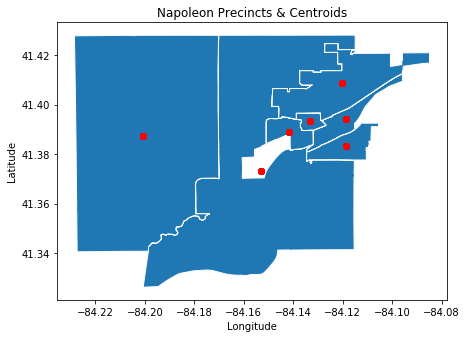

In [6]:
# look at only precincts that make up the *Napoleon* group of precincts
Napoleon_df = precincts_gdf[precincts_gdf["PRECINCT"]=='Napoleon'].copy()

# allocate empty lists for latitude and longitude of each of these precincts
Nap_lon = []
Nap_lat = []

# loop over all precincts Napoleon
for i in range(0,Napoleon_df.shape[0]):
    lon = Napoleon_df.iloc[i]["geometry"].centroid.coords[0][0]
    lat = Napoleon_df.iloc[i]["geometry"].centroid.coords[0][1]
    #print(lon, lat)
    Nap_lon.append(lon)
    Nap_lat.append(lat)
    
# convert lists to dataframes
Nap_lon_df = pd.DataFrame(Nap_lon)
Nap_lat_df = pd.DataFrame(Nap_lat)
#print(Nap_lon_df.shape)
#print(type(Nap_lon_df))
Nap_lon_df.head()

# reset row indices (index) so that index matches on columns to be added
Napoleon_df.reset_index(inplace=True)

# add lon/lat columns to original Napoleon_df dataframe to plot
Napoleon_df["centroid_lon"] = Nap_lon_df
Napoleon_df["centroid_lat"] = Nap_lat_df
#print(Napoleon_df.shape)
Napoleon_df.head()

# plot Napoleon precincts
fig = Napoleon_df.plot(figsize=[7,7], edgecolor='white')

# plot centroid of each Napoleon precincts
for i in range(0,Napoleon_df.shape[0]):
        
    plt.scatter(Napoleon_df.iloc[i]["centroid_lon"], 
                Napoleon_df.iloc[i]["centroid_lat"], 
                color='r')
    
fig.set_title('Napoleon Precincts & Centroids')
fig.set_xlabel('Longitude')
fig.set_ylabel('Latitude')

So, let's apply this approach to the whole dataframe. But first we must do a bit of cleaning.

In [7]:
# indices columns containing raw vote counts
i_start = precincts_gdf.columns.get_loc("pres_16_james_jerome_bell_wi")
i_end = precincts_gdf.columns.get_loc("pres_16_donald_j_trump_r")

# drop any row that has a null/NaN/inf value in ANY of the vote count columns
for i in range(i_start,i_end+1):
    precincts_gdf = precincts_gdf[~pd.isnull(precincts_gdf.iloc[:,i])].copy()
    
# reset row index values to for easy looping AND to add new columns (index values must match)
precincts_gdf.reset_index(inplace=True)

# remove COLUMN named 'index'
precincts_gdf.drop('index', axis=1, inplace=True)

# only keep rows with non-empty geometry cells (make copy to avoid slice overwriting)
ohio_df = precincts_gdf[~precincts_gdf["geometry"].is_empty].copy()

In [8]:
# check
print(ohio_df.shape)
ohio_df.head()

(10295, 38)


,PRECINCT,COUNTY,global_id,COUNTYGEOID10,PRECINCT_election_results,PRECINCTCODE_election_results,PRECINCT_misfit,county_name,precinct_code,region_name,media_market,pres_16_registered_voters,pres_16_total_voters,pres_16_turnout_percentage,pres_16_james_jerome_bell_wi,pres_16_michael_bickelmeyer_wi,pres_16_darrell_l_castle_wi,pres_16_hillary_clinton_d,pres_16_richard_duncan,pres_16_cherunda_fox_wi,pres_16_ben_hartnell_wi,pres_16_tom_hoefling_wi,pres_16_bruce_e_jaynes_wi,pres_16_gary_johnson,pres_16_chris_keniston_wi,pres_16_barry_kirschner_wi,pres_16_laurence_kotlikoff_wi,pres_16_joseph_maldonado_wi,pres_16_michael_andrew_maturen_wi,pres_16_evan_mc_mullin_wi,pres_16_monica_moorehead_wi,pres_16_joe_schriner_wi,pres_16_mike_smith_wi,pres_16_jill_stein_g,pres_16_josiah_r_stroh_wi,pres_16_douglas_w_thomson_wi,pres_16_donald_j_trump_r,geometry
0,GALLIPOLIS CITY 1,gallia,4179.0,39053.0,GALLIPOLIS CITY 1,AAA,None,Gallia,AAA,Southeast,Charleston,601.0,386.0,64.23,0.0,0.0,0.0,100.0,2.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,267.0,(POLYGON ((-82.21852200042079 38.813...
1,GALLIPOLIS CITY 3,gallia,4180.0,39053.0,GALLIPOLIS CITY 3,AAB,None,Gallia,AAB,Southeast,Charleston,1113.0,675.0,60.65,0.0,0.0,0.0,177.0,5.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,449.0,(POLYGON ((-82.15477500020693 38.837...
2,GALLIPOLIS CITY 2,gallia,4181.0,39053.0,GALLIPOLIS CITY 2,AAE,None,Gallia,AAE,Southeast,Charleston,582.0,393.0,67.53,0.0,0.0,0.0,113.0,3.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,247.0,(POLYGON ((-82.20163199954212 38.820...
3,ADDISON TOWNSHIP,gallia,4182.0,39053.0,ADDISON TWP,AAG,None,Gallia,AAG,Southeast,Charleston,1357.0,984.0,72.51,0.0,0.0,0.0,167.0,12.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,752.0,(POLYGON ((-82.16222800051644 38.932...
4,CHESHIRE TOWNSHIP,gallia,4183.0,39053.0,CHESHIRE TWP,AAI,None,Gallia,AAI,Southeast,Charleston,616.0,429.0,69.64,0.0,0.0,0.0,81.0,4.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,330.0,(POLYGON ((-82.21732899953564 38.934...


Calculate the centroids for all precincts and add to dataframe.

In [9]:
# allocate empty lists for latitude and longitude
oh_lon = []
oh_lat = []

# loop over all precincts Napoleon
for i in range(0,ohio_df.shape[0]):
    lon = ohio_df.iloc[i]["geometry"].centroid.coords[0][0]
    lat = ohio_df.iloc[i]["geometry"].centroid.coords[0][1]
    oh_lon.append(lon)
    oh_lat.append(lat)
    
# convert lists to dataframes
oh_lon_df = pd.DataFrame(oh_lon)
oh_lat_df = pd.DataFrame(oh_lat)
#print(Nap_lon_df.shape, Nap_lat_df.shape)

In [10]:
# add lon/lat columns to original Napoleon_df dataframe to plot
ohio_df["centroid_lon"] = oh_lon_df
ohio_df["centroid_lat"] = oh_lat_df

In [11]:
# check
print(ohio_df.shape)
ohio_df.head()

(10295, 40)


,PRECINCT,COUNTY,global_id,COUNTYGEOID10,PRECINCT_election_results,PRECINCTCODE_election_results,PRECINCT_misfit,county_name,precinct_code,region_name,media_market,pres_16_registered_voters,pres_16_total_voters,pres_16_turnout_percentage,pres_16_james_jerome_bell_wi,pres_16_michael_bickelmeyer_wi,pres_16_darrell_l_castle_wi,pres_16_hillary_clinton_d,pres_16_richard_duncan,pres_16_cherunda_fox_wi,pres_16_ben_hartnell_wi,pres_16_tom_hoefling_wi,pres_16_bruce_e_jaynes_wi,pres_16_gary_johnson,pres_16_chris_keniston_wi,pres_16_barry_kirschner_wi,pres_16_laurence_kotlikoff_wi,pres_16_joseph_maldonado_wi,pres_16_michael_andrew_maturen_wi,pres_16_evan_mc_mullin_wi,pres_16_monica_moorehead_wi,pres_16_joe_schriner_wi,pres_16_mike_smith_wi,pres_16_jill_stein_g,pres_16_josiah_r_stroh_wi,pres_16_douglas_w_thomson_wi,pres_16_donald_j_trump_r,geometry,centroid_lon,centroid_lat
0,GALLIPOLIS CITY 1,gallia,4179.0,39053.0,GALLIPOLIS CITY 1,AAA,None,Gallia,AAA,Southeast,Charleston,601.0,386.0,64.23,0.0,0.0,0.0,100.0,2.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,267.0,(POLYGON ((-82.21852200042079 38.813...,-82.213177,38.806066
1,GALLIPOLIS CITY 3,gallia,4180.0,39053.0,GALLIPOLIS CITY 3,AAB,None,Gallia,AAB,Southeast,Charleston,1113.0,675.0,60.65,0.0,0.0,0.0,177.0,5.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,449.0,(POLYGON ((-82.15477500020693 38.837...,-82.177677,38.824904
2,GALLIPOLIS CITY 2,gallia,4181.0,39053.0,GALLIPOLIS CITY 2,AAE,None,Gallia,AAE,Southeast,Charleston,582.0,393.0,67.53,0.0,0.0,0.0,113.0,3.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,247.0,(POLYGON ((-82.20163199954212 38.820...,-82.211522,38.816566
3,ADDISON TOWNSHIP,gallia,4182.0,39053.0,ADDISON TWP,AAG,None,Gallia,AAG,Southeast,Charleston,1357.0,984.0,72.51,0.0,0.0,0.0,167.0,12.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,752.0,(POLYGON ((-82.16222800051644 38.932...,-82.178235,38.890661
4,CHESHIRE TOWNSHIP,gallia,4183.0,39053.0,CHESHIRE TWP,AAI,None,Gallia,AAI,Southeast,Charleston,616.0,429.0,69.64,0.0,0.0,0.0,81.0,4.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,330.0,(POLYGON ((-82.21732899953564 38.934...,-82.157784,38.969485


Ok, this is all we need for the next section. However, let's do a little bit more work here by creating a binary "winner" column (0=Trump, 1=Clinton) and plot all precincts colored by "winner" (red=Trump, blue=Clinton).

In [12]:
# list of columns that contain vote counts
vote_columns = ['pres_16_james_jerome_bell_wi',
       'pres_16_michael_bickelmeyer_wi', 'pres_16_darrell_l_castle_wi',
       'pres_16_hillary_clinton_d', 'pres_16_richard_duncan',
       'pres_16_cherunda_fox_wi', 'pres_16_ben_hartnell_wi',
       'pres_16_tom_hoefling_wi', 'pres_16_bruce_e_jaynes_wi',
       'pres_16_gary_johnson', 'pres_16_chris_keniston_wi',
       'pres_16_barry_kirschner_wi', 'pres_16_laurence_kotlikoff_wi',
       'pres_16_joseph_maldonado_wi', 'pres_16_michael_andrew_maturen_wi',
       'pres_16_evan_mc_mullin_wi', 'pres_16_monica_moorehead_wi',
       'pres_16_joe_schriner_wi', 'pres_16_mike_smith_wi',
       'pres_16_jill_stein_g', 'pres_16_josiah_r_stroh_wi',
       'pres_16_douglas_w_thomson_wi', 'pres_16_donald_j_trump_r']

# create column with lead vote winner name
ohio_df["winner"] = ohio_df[vote_columns].astype(int).idxmax(axis='columns')

# create empty list containing for winner as binary: 0/1 == Trump/Hillary
win_bi = []

# assign binary values...
for i in range(0,ohio_df.shape[0]):
    if (ohio_df.iloc[i]["winner"] == "pres_16_donald_j_trump_r"):
        win_bi.append(0)
    elif (ohio_df.iloc[i]["winner"] == "pres_16_hillary_clinton_d"):
        win_bi.append(1)
    else:
        print("else @ i=",i)
        #win_bi.append(2)
        
#win_bi
ohio_df["winner_binary"] = win_bi

In [13]:
# add column 'Precinct_ID' == index
ohio_df["Precinct_ID"] = ohio_df.index

# move "Precinct_ID" to first column
ohio_df = ohio_df.set_index('Precinct_ID').reset_index()

In [14]:
# check final dataframe (last 5 columns are relevant for plotting)
print(ohio_df.shape)
ohio_df.head()

(10295, 43)


,Precinct_ID,PRECINCT,COUNTY,global_id,COUNTYGEOID10,PRECINCT_election_results,PRECINCTCODE_election_results,PRECINCT_misfit,county_name,precinct_code,region_name,media_market,pres_16_registered_voters,pres_16_total_voters,pres_16_turnout_percentage,pres_16_james_jerome_bell_wi,pres_16_michael_bickelmeyer_wi,pres_16_darrell_l_castle_wi,pres_16_hillary_clinton_d,pres_16_richard_duncan,pres_16_cherunda_fox_wi,pres_16_ben_hartnell_wi,pres_16_tom_hoefling_wi,pres_16_bruce_e_jaynes_wi,pres_16_gary_johnson,pres_16_chris_keniston_wi,pres_16_barry_kirschner_wi,pres_16_laurence_kotlikoff_wi,pres_16_joseph_maldonado_wi,pres_16_michael_andrew_maturen_wi,pres_16_evan_mc_mullin_wi,pres_16_monica_moorehead_wi,pres_16_joe_schriner_wi,pres_16_mike_smith_wi,pres_16_jill_stein_g,pres_16_josiah_r_stroh_wi,pres_16_douglas_w_thomson_wi,pres_16_donald_j_trump_r,geometry,centroid_lon,centroid_lat,winner,winner_binary
0,0,GALLIPOLIS CITY 1,gallia,4179.0,39053.0,GALLIPOLIS CITY 1,AAA,None,Gallia,AAA,Southeast,Charleston,601.0,386.0,64.23,0.0,0.0,0.0,100.0,2.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,267.0,(POLYGON ((-82.21852200042079 38.813...,-82.213177,38.806066,pres_16_donald_j_trump_r,0
1,1,GALLIPOLIS CITY 3,gallia,4180.0,39053.0,GALLIPOLIS CITY 3,AAB,None,Gallia,AAB,Southeast,Charleston,1113.0,675.0,60.65,0.0,0.0,0.0,177.0,5.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,449.0,(POLYGON ((-82.15477500020693 38.837...,-82.177677,38.824904,pres_16_donald_j_trump_r,0
2,2,GALLIPOLIS CITY 2,gallia,4181.0,39053.0,GALLIPOLIS CITY 2,AAE,None,Gallia,AAE,Southeast,Charleston,582.0,393.0,67.53,0.0,0.0,0.0,113.0,3.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,247.0,(POLYGON ((-82.20163199954212 38.820...,-82.211522,38.816566,pres_16_donald_j_trump_r,0
3,3,ADDISON TOWNSHIP,gallia,4182.0,39053.0,ADDISON TWP,AAG,None,Gallia,AAG,Southeast,Charleston,1357.0,984.0,72.51,0.0,0.0,0.0,167.0,12.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,752.0,(POLYGON ((-82.16222800051644 38.932...,-82.178235,38.890661,pres_16_donald_j_trump_r,0
4,4,CHESHIRE TOWNSHIP,gallia,4183.0,39053.0,CHESHIRE TWP,AAI,None,Gallia,AAI,Southeast,Charleston,616.0,429.0,69.64,0.0,0.0,0.0,81.0,4.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,330.0,(POLYGON ((-82.21732899953564 38.934...,-82.157784,38.969485,pres_16_donald_j_trump_r,0


In [15]:
# convert back to original CRS for improved plotting
ohio_df = ohio_df.to_crs(epsg=2958)

In [16]:
# import library to create custom colormap
from matplotlib.colors import LinearSegmentedColormap

(151095.86413011057, 559225.0243981235, 4231929.981505227, 4667176.236039724)

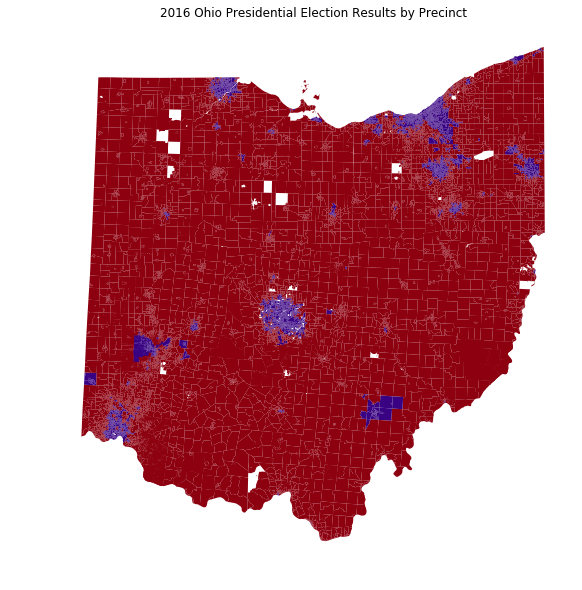

In [17]:
# create custom colormap (red=Trump, blue=Clinton)
cmap2 = LinearSegmentedColormap.from_list("", ["xkcd:crimson","xkcd:indigo"])

# plot
fig = ohio_df.plot(column='winner_binary', figsize=[10,10], cmap=cmap2)
fig.set_title('2016 Ohio Presidential Election Results by Precinct')
plt.axis('off')

# plt.show()

#### Data: Characterizing precincts by their venues/businesses/services

The third data set we need must somehow characterize "rural" and "urban" voting areas. To do this, we will utilize Foursquare (www.foursquare.com) venue data to generate feature sets for each precinct. The feature sets will be comprised of the category types (i.e. "Italian Restaurant", "Gas Station", "Auto Mechanic", etc.) for the venues found in each precinct. Calls to the Foursquare API return JSON information, which we will tranform into a Pandas dataframe for analysis. Although we won't initially label precincts as rural or urban, once we have done some analysis, we will see if there are voting patterns for precincts with very few, or zero, venues (presumed to be rural), versus precincts with many venues (presumed to be urban).

Let's take a look at the Foursquare data:

In [18]:
# import libraries
import json # JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

In [19]:
# Foursqaure credentials and version info
CLIENT_ID = 'LP5VHPFD4PUKCOMHHJALFLDBF5INH5IUO45AYV4RZXDE505R' # your Foursquare ID
CLIENT_SECRET = 'VXXTJLOK5SACL4AMNMONAATB3UR4JSOST2OLF4PBJZMPE0RG' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Credentails:
CLIENT_ID: LP5VHPFD4PUKCOMHHJALFLDBF5INH5IUO45AYV4RZXDE505R
CLIENT_SECRET:VXXTJLOK5SACL4AMNMONAATB3UR4JSOST2OLF4PBJZMPE0RG


In [20]:
# Create a function to "explore" (get venues for) all the precincts
def getNearbyVenues(names, latitudes, longitudes, radius=3500, LIMIT = 100):
    
    # allocate empty venues list
    venues_list=[]
    
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
#         try:
#             results = requests.get(url).json()["response"]['groups'][0]['items']
#         except:
#             print(name)
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Precinct_ID', 
                  'Precinct Latitude', 
                  'Precinct Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

It should be noted that "The Foursquare API has a limit of 950 Regular API Calls per day". However, by verifying your Foursquare account with a credit card (which is not charged), this limit is raised to 99,500 calls per day. The following raw text cell shows the code to request the Foursquare data, but is not used here. Instead I have previously run this code and saved the Foursquare data to CSV file, since getting this information from the Foursquare API can be time consuming.

In [21]:
# # call the function
# precinct_venues = getNearbyVenues(names=pd.Series(ohio_df.index.values),
#                                  latitudes=ohio_df['centroid_lat'],
#                                  longitudes=ohio_df['centroid_lon']
#                                  )

Load the Foursquare venue data that I had previously saved to a CSV file:

In [21]:
# load the cached Foursqaure data (rather make calls to FQ API again)
precinct_venues = pd.read_csv("precinct_venues_agg_FQ.csv")

In [22]:
# drop 'Unnamed: 0' column
precinct_venues.drop(['Unnamed: 0'], axis=1, inplace=True)

# rename column to match column in ohio_df
precinct_venues.rename(columns={"Precinct": "Precinct_ID"}, inplace=True)

In [23]:
# check it out
print(precinct_venues.shape)
print(precinct_venues.columns)
precinct_venues.head()

(528644, 7)
Index(['Precinct_ID', 'Precinct Latitude', 'Precinct Longitude', 'Venue',
       'Venue Latitude', 'Venue Longitude', 'Venue Category'],
      dtype='object')


,Precinct_ID,Precinct Latitude,Precinct Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,38.806066,-82.213177,Courtside Bar And Grill,38.806786,-82.206826,Bar
1,0,38.806066,-82.213177,Shake Shoppe,38.814543,-82.194659,Fast Food Restaurant
2,0,38.806066,-82.213177,Dollar General,38.807222,-82.206783,Discount Store
3,0,38.806066,-82.213177,Speedway,38.813934,-82.197190,Gas Station
4,0,38.806066,-82.213177,Tuscany Cuccini,38.817761,-82.185092,Italian Restaurant


As we can see, each row contains venue location and category data. Each venue is mapped to the corresponding precinct. Some precincts may have multiple venues, so are shown in multiple rows. Some precincts may not have any venues, so are not present in this dataframe. 

#### Data: Convert venue categories to *one-hot* feature set

First, a dataframe is created which contains every venue found in Ohio, where each venue is represented as a single row. Second, a column is assigned to every possible venue category, where each venue row assigns a value of 1 to the column of the corresponding venue category, and assigns a value of 0 to all other columns. Third, all venues in each precinct are combined into a single row and the venue category columns are summed to produce raw counts of every venue category in each precinct. Finally, the summed venue category columns are normalized for each precint, so that all precincts will have the same weight when building a model.

In [33]:
# import library
import numpy as np

In [26]:
# one hot encoding
precinct_onehot = pd.get_dummies(precinct_venues[['Venue Category']], prefix="", prefix_sep="")

# replace column 'Neighborhood' ==> 'Precinct'
precinct_onehot.rename(columns={"Neighborhood": "Precinct_ID"}, inplace=True)

# convert current neighborhood column from one-hot to the actual neighborhood name
precinct_onehot['Precinct_ID'] = precinct_venues['Precinct_ID']

# move neighborhood column to the first column
precinct_onehot = precinct_onehot.set_index('Precinct_ID').reset_index()

# combine each unique precinct into a single row ==> take average of one-hot values
precinct_grouped = precinct_onehot.groupby('Precinct_ID').mean().reset_index()

# check
print(precinct_grouped.shape)
precinct_grouped.head()

(528644, 528)


,ATM,Accessories Store,Adult Boutique,Advertising Agency,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Apres Ski Bar,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Assisted Living,Astrologer,Athletics & Sports,Australian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Bavarian Restaurant,Bay,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat Rental,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Bulgarian Restaurant,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Canal Lock,Candy Store,Cantonese Restaurant,Capitol Building,Car Wash,Caribbean Restaurant,Carpet Store,Casino,Castle,Cave,Cemetery,Cheese Shop,Child Care Service,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Circus,City,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Auditorium,College Baseball Diamond,College Basketball Court,College Bookstore,College Cafeteria,College Football Field,College Gym,College Hockey Rink,College Quad,College Rec Center,College Science Building,College Theater,College Track,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Coworking Space,Credit Union,Cuban Restaurant,Cultural Center,Cupcake Shop,Curling Ice,Cycle Studio,Czech Restaurant,Dance Studio,Deli / Bodega,Dentist's Office,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Distillery,Dive Bar,Dive Spot,Doctor's Office,Dog Run,Donut Shop,Drive-in Theater,Drugstore,Dry Cleaner,Dutch Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Empanada Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Fabric Shop,Factory,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Festival,Field,Filipino Restaurant,Financial or Legal Service,Fire Station,Fireworks Store,Fish & Chips Shop,Fish Market,Fishing Spot,Fishing Store,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Forest,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,High School,Hill,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Field,Hockey Rink,Home Service,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Housing Development,Hunan Restaurant,Hungarian Restaurant,Hunting Supply,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Insurance Office,Internet Cafe,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,

In [197]:
print(precinct_grouped.shape)
precinct_grouped.head()

(10142, 528)


,Precinct_ID,ATM,Accessories Store,Adult Boutique,Advertising Agency,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Apres Ski Bar,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Assisted Living,Astrologer,Athletics & Sports,Australian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Bavarian Restaurant,Bay,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat Rental,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Bulgarian Restaurant,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Canal Lock,Candy Store,Cantonese Restaurant,Capitol Building,Car Wash,Caribbean Restaurant,Carpet Store,Casino,Castle,Cave,Cemetery,Cheese Shop,Child Care Service,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Circus,City,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Auditorium,College Baseball Diamond,College Basketball Court,College Bookstore,College Cafeteria,College Football Field,College Gym,College Hockey Rink,College Quad,College Rec Center,College Science Building,College Theater,College Track,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Coworking Space,Credit Union,Cuban Restaurant,Cultural Center,Cupcake Shop,Curling Ice,Cycle Studio,Czech Restaurant,Dance Studio,Deli / Bodega,Dentist's Office,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Distillery,Dive Bar,Dive Spot,Doctor's Office,Dog Run,Donut Shop,Drive-in Theater,Drugstore,Dry Cleaner,Dutch Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Empanada Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Fabric Shop,Factory,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Festival,Field,Filipino Restaurant,Financial or Legal Service,Fire Station,Fireworks Store,Fish & Chips Shop,Fish Market,Fishing Spot,Fishing Store,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Forest,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,High School,Hill,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Field,Hockey Rink,Home Service,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Housing Development,Hunan Restaurant,Hungarian Restaurant,Hunting Supply,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Insurance Office,Internet Cafe,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen S

#### Data: Merge precinct voting dataframe & Foursquare one-hot venue dataframe

The dataframe containing the precinct vote counts and boundaries is combined with the one-hot venue dataframe.

In [34]:
# merge based on the common column 'Precinct_ID' found in both dataframes
df_merged = ohio_df.merge(precinct_grouped, how='outer', on='Precinct_ID')

# find column indices for one-hot section of new df
j_start = df_merged.columns.get_loc("ATM")
j_end = df_merged.columns.get_loc("Zoo Exhibit")

# assign value of zero to all NaN values in one-hot section of df_merged
df_merged.fillna(0, inplace=True)

# check
print(df_merged.shape)
df_merged.head()

## Methodology

#### Methodology: Clustering with K-Means (k=2)

In [38]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [140]:
# find column indices for one-hot section of new df
j_start = df_merged.columns.get_loc("ATM")
j_end = df_merged.columns.get_loc("Zoo Exhibit")

# isolate one-hot section
print(df_merged.iloc[:,j_start:j_end+1].shape)
#df_merged.iloc[:,j_start:].head()
df_merged.iloc[0:5,j_start:j_end+1]

(10295, 527)


,ATM,Accessories Store,Adult Boutique,Advertising Agency,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Apres Ski Bar,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Assisted Living,Astrologer,Athletics & Sports,Australian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Bavarian Restaurant,Bay,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat Rental,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Bulgarian Restaurant,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Canal Lock,Candy Store,Cantonese Restaurant,Capitol Building,Car Wash,Caribbean Restaurant,Carpet Store,Casino,Castle,Cave,Cemetery,Cheese Shop,Child Care Service,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Circus,City,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Auditorium,College Baseball Diamond,College Basketball Court,College Bookstore,College Cafeteria,College Football Field,College Gym,College Hockey Rink,College Quad,College Rec Center,College Science Building,College Theater,College Track,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Coworking Space,Credit Union,Cuban Restaurant,Cultural Center,Cupcake Shop,Curling Ice,Cycle Studio,Czech Restaurant,Dance Studio,Deli / Bodega,Dentist's Office,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Distillery,Dive Bar,Dive Spot,Doctor's Office,Dog Run,Donut Shop,Drive-in Theater,Drugstore,Dry Cleaner,Dutch Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Empanada Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Fabric Shop,Factory,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Festival,Field,Filipino Restaurant,Financial or Legal Service,Fire Station,Fireworks Store,Fish & Chips Shop,Fish Market,Fishing Spot,Fishing Store,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Forest,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,High School,Hill,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Field,Hockey Rink,Home Service,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Housing Development,Hunan Restaurant,Hungarian Restaurant,Hunting Supply,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Insurance Office,Internet Cafe,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,

In [154]:
# set number of clusters, let's try k=2 first, since vote can be Rep or Dem only
kclusters = 2

# isolate one-hot section of df_merged
oh_clust = df_merged.iloc[:,j_start:j_end+1]

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(oh_clust)

In [155]:
# overwrite column for cluster labels
if 'cluster' in df_merged.columns:
    df_merged['cluster'] = kmeans.labels_
# add column for cluster labels
else:
    df_merged.insert(0, 'cluster', kmeans.labels_)

In [156]:
# check cluster categories
df_merged["cluster"].unique()

array([0, 1])

In [157]:
# check counts of each cluster
df_merged["cluster"].value_counts()

0    9921
1     374
Name: cluster, dtype: int64

In [158]:
# compare to actual precinct counts (0=Trump, 1=Clinton)
df_merged["winner_binary"].value_counts()

0    7163
1    3132
Name: winner_binary, dtype: int64

In [159]:
#predictions = np.where(df_merged["cluster"]==df_merged["winner_binary"], True, False)
#df_merged["predictions"] = np.where(df_merged["cluster"]==df_merged["winner_binary"], True, False)
#del df_merged['predictions']

In [160]:
print(df_merged.shape)
df_merged.head()

(10295, 571)


,cluster,Precinct_ID,PRECINCT,COUNTY,global_id,COUNTYGEOID10,PRECINCT_election_results,PRECINCTCODE_election_results,PRECINCT_misfit,county_name,precinct_code,region_name,media_market,pres_16_registered_voters,pres_16_total_voters,pres_16_turnout_percentage,pres_16_james_jerome_bell_wi,pres_16_michael_bickelmeyer_wi,pres_16_darrell_l_castle_wi,pres_16_hillary_clinton_d,pres_16_richard_duncan,pres_16_cherunda_fox_wi,pres_16_ben_hartnell_wi,pres_16_tom_hoefling_wi,pres_16_bruce_e_jaynes_wi,pres_16_gary_johnson,pres_16_chris_keniston_wi,pres_16_barry_kirschner_wi,pres_16_laurence_kotlikoff_wi,pres_16_joseph_maldonado_wi,pres_16_michael_andrew_maturen_wi,pres_16_evan_mc_mullin_wi,pres_16_monica_moorehead_wi,pres_16_joe_schriner_wi,pres_16_mike_smith_wi,pres_16_jill_stein_g,pres_16_josiah_r_stroh_wi,pres_16_douglas_w_thomson_wi,pres_16_donald_j_trump_r,geometry,centroid_lon,centroid_lat,winner,winner_binary,ATM,Accessories Store,Adult Boutique,Advertising Agency,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Apres Ski Bar,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Assisted Living,Astrologer,Athletics & Sports,Australian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Bavarian Restaurant,Bay,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat Rental,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Bulgarian Restaurant,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Canal Lock,Candy Store,Cantonese Restaurant,Capitol Building,Car Wash,Caribbean Restaurant,Carpet Store,Casino,Castle,Cave,Cemetery,Cheese Shop,Child Care Service,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Circus,City,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Auditorium,College Baseball Diamond,College Basketball Court,College Bookstore,College Cafeteria,College Football Field,College Gym,College Hockey Rink,College Quad,College Rec Center,College Science Building,College Theater,College Track,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Coworking Space,Credit Union,Cuban Restaurant,Cultural Center,Cupcake Shop,Curling Ice,Cycle Studio,Czech Restaurant,Dance Studio,Deli / Bodega,Dentist's Office,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Distillery,Dive Bar,Dive Spot,Doctor's Office,Dog Run,Donut Shop,Drive-in Theater,Drugstore,Dry Cleaner,Dutch Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Empanada Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Fabric Shop,Factory,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Festival,Field,Filipino Restaurant,Financial or Legal Service,Fire Station,Fireworks Store,Fish & Chips Shop,Fish Market,Fishing Spot,Fishing Store,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Forest,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Re

(151095.86413011057, 559225.0243981235, 4231929.981505227, 4667176.236039724)

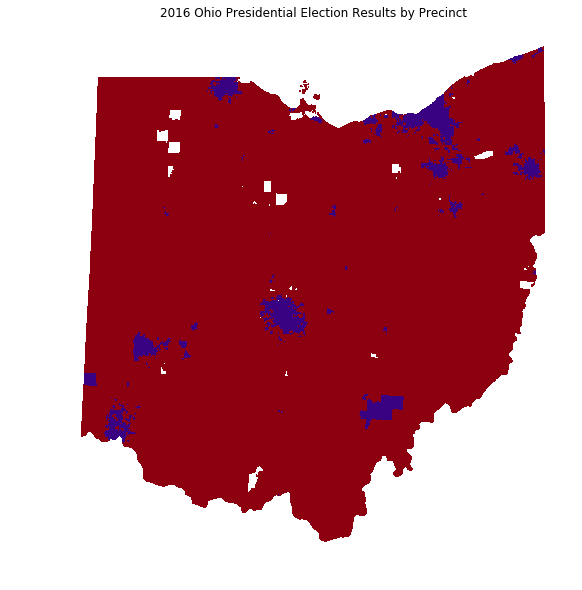

In [161]:
# plot ACTUAL winners
fig = df_merged.plot(column='winner_binary', figsize=[10,10], antialiased=False, cmap=cmap2)
fig.set_title('2016 Ohio Presidential Election Results by Precinct')
plt.axis('off')

(151095.86413011057, 559225.0243981235, 4231929.981505227, 4667176.236039724)

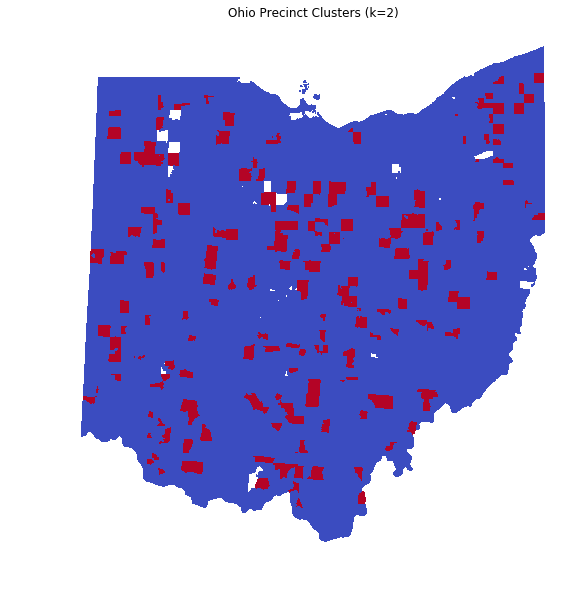

In [172]:
# plot clusters
fig = df_merged.plot(column='cluster', 
               figsize=[10,10], 
               antialiased=False, 
               cmap='coolwarm')
fig.set_title('Ohio Precinct Clusters (k=2)')
plt.axis('off')

Clearly, two clusters are not sufficient to describe the precincts. Therefore, *at least* three clusters are needed. It appears that the cluster represented by small squares are far from major cities, so perhaps these are very rural. The k-means clustering algorithm will be applied for k=(3,5,10) to see if there is anything to be learned about the precincts from their venues.

#### Methodology: Clustering with K-Means (k=3,5,10)

In [182]:
def kMeansPlot(k, plotclusters=True, cmapchoice='coolwarm'):

    # find column indices for one-hot section of new df
    j_start = df_merged.columns.get_loc("ATM")
    j_end = df_merged.columns.get_loc("Zoo Exhibit")

    # set number of clusters
    kclusters = k

    # isolate one-hot section of df_merged
    oh_clust = df_merged.iloc[:,j_start:j_end+1]

    # run k-means clustering
    kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(oh_clust)

    # overwrite column for cluster labels
    if 'cluster' in df_merged.columns:
        df_merged['cluster'] = kmeans.labels_
    # add column for cluster labels
    else:
        df_merged.insert(0, 'cluster', kmeans.labels_)

    if (plotclusters==True):
        # plot clusters
        fig = df_merged.plot(column='cluster', 
                       figsize=[10,10], 
                       antialiased=False, 
                       cmap=cmapchoice)
        fig.set_title('Ohio Precinct Clusters (k={})'.format(k))
        plt.axis('off')

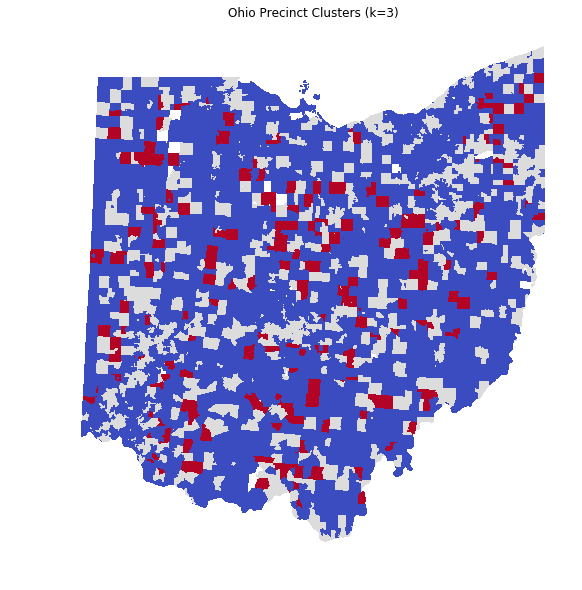

In [183]:
# plot the results of k-means clustering w/ k=3
kMeansPlot(3)

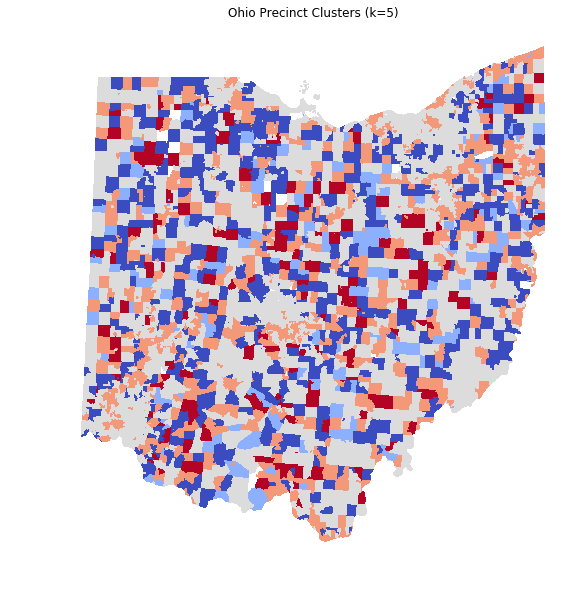

In [184]:
# plot the results of k-means clustering w/ k=5
kMeansPlot(5)

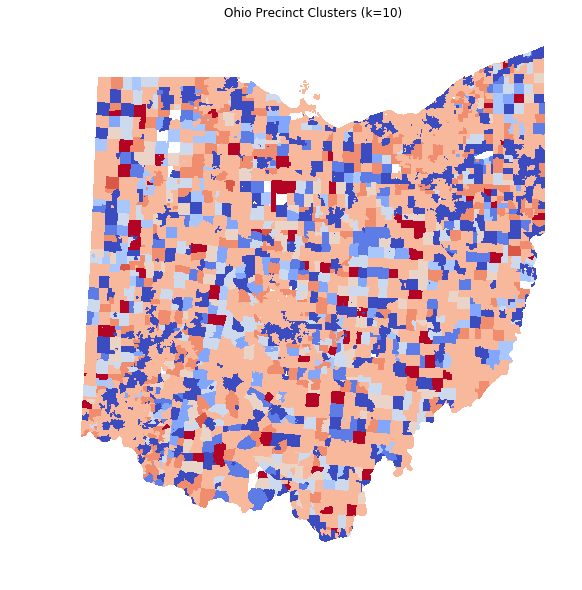

In [185]:
# plot the results of k-means clustering w/ k=10
kMeansPlot(10)

Unfortunately, with the venue category feature set alone, the k-means clustering algorithm does not provide clear precinct separation in a way that reflects the results of the 2016 Presidential Election.

In [187]:
# # create predicted winner column and assign appropriate integer value
# df_merged['winner_predicted'].replace(0, 'pres_16_hillary_clinton_d', inplace=True)
# df_merged['winner_predicted'].replace(1, 'pres_16_donald_j_trump_r', inplace=True)
# df_merged['winner_predicted'].replace(2, 'pres_16_donald_j_trump_r', inplace=True)

# # create True/False predictions column
# df_merged["predictions"] = np.where(df_merged["winner_predicted"]==df_merged["winner"], True, False)

#### Methodology: Data exploration using k-means clustering (k=3)

If the results of the election are included in the feature set, along with the venue categories, the k-means clustering algorithm can provide some further understanding of the precincts beyond merely separating the precincts by election results alone. This new one-hot matrix data will be separated into a dataframe for each cluster so that they can be characterized. So, rather than use the method we used above, we have to modify it so that the one-hot columns selected also include the 'winner_binary' column.

In [189]:
df_merged.iloc[:,j_start-1:j_end+1].head()

,winner_binary,ATM,Accessories Store,Adult Boutique,Advertising Agency,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Apres Ski Bar,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Assisted Living,Astrologer,Athletics & Sports,Australian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Bavarian Restaurant,Bay,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat Rental,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Bulgarian Restaurant,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Canal Lock,Candy Store,Cantonese Restaurant,Capitol Building,Car Wash,Caribbean Restaurant,Carpet Store,Casino,Castle,Cave,Cemetery,Cheese Shop,Child Care Service,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Circus,City,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Auditorium,College Baseball Diamond,College Basketball Court,College Bookstore,College Cafeteria,College Football Field,College Gym,College Hockey Rink,College Quad,College Rec Center,College Science Building,College Theater,College Track,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Coworking Space,Credit Union,Cuban Restaurant,Cultural Center,Cupcake Shop,Curling Ice,Cycle Studio,Czech Restaurant,Dance Studio,Deli / Bodega,Dentist's Office,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Distillery,Dive Bar,Dive Spot,Doctor's Office,Dog Run,Donut Shop,Drive-in Theater,Drugstore,Dry Cleaner,Dutch Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Empanada Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Fabric Shop,Factory,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Festival,Field,Filipino Restaurant,Financial or Legal Service,Fire Station,Fireworks Store,Fish & Chips Shop,Fish Market,Fishing Spot,Fishing Store,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Forest,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,High School,Hill,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Field,Hockey Rink,Home Service,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Housing Development,Hunan Restaurant,Hungarian Restaurant,Hunting Supply,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Insurance Office,Internet Cafe,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen

(151095.86413011057, 559225.0243981235, 4231929.981505227, 4667176.236039724)

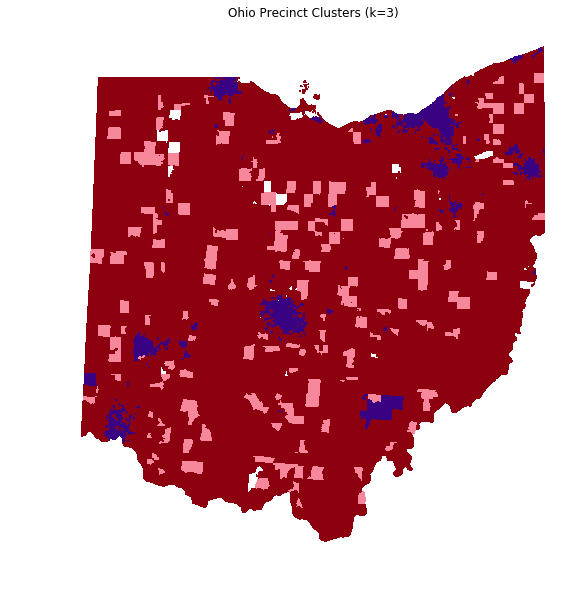

In [194]:
# find column indices for one-hot section of new df
j_start = df_merged.columns.get_loc("ATM")
j_end = df_merged.columns.get_loc("Zoo Exhibit")

# set number of clusters
kclusters = 3

# isolate one-hot section of df_merged
oh_clust = df_merged.iloc[:,j_start-1:j_end+1]

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(oh_clust)

# overwrite column for cluster labels
if 'cluster' in df_merged.columns:
    df_merged['cluster'] = kmeans.labels_
# add column for cluster labels
else:
    df_merged.insert(0, 'cluster', kmeans.labels_)
    
# custom colormap
cmap3 = LinearSegmentedColormap.from_list("", ["xkcd:rose pink","xkcd:indigo","xkcd:crimson"])

# plot clusters
fig = df_merged.plot(column='cluster', 
               figsize=[10,10], 
               antialiased=False, 
               cmap=cmap3)
fig.set_title('Ohio Precinct Clusters (k={})'.format(kclusters))
plt.axis('off')

The k-means clustering algorithm has isolated the Democratic precincts into a single cluster, and split the Republican precincts into two clusters. Of course, we could get finer granularity about different types of Republican and Democratic precincts by increasing the number of clusters. However, for the purposes here, only three clusters are needed to get some insight into rural and urban voting patterns. In addition, later in this notebook, classification algorithms will be used to determine the predictive power of venue categories on precinct voting patterns.

In [196]:
df_merged['cluster'].value_counts()

2    6788
1    3132
0     375
Name: cluster, dtype: int64

In [198]:
# create df containing only 'cluster' and 'Precinct_ID'
clust_ID = df_merged[['cluster', 'Precinct_ID']]

# merge clust_ID & one-hot df 
onehot_clusters = clust_ID.merge(precinct_onehot, how='outer', on='Precinct_ID')

In [200]:
# check which clusters contain precincts w/o any venues
precID_none = onehot_clusters[onehot_clusters.isna().any(axis=1)][['cluster','Precinct_ID']]
print(precID_none.shape)
print(precID_none['cluster'].unique())

(153, 2)
[2]


All precincts w/o any venues were assigned to cluster=2. Now replace all NaN values in the one-hot matrix with zeros.

In [ ]:
# assign value of zero to all NaN values in one-hot section of df_merged
onehot_clusters.fillna(0, inplace=True)

Separate the one-hot dataframes by cluster, which will then be modified to contain raw counts of venue categories. And then generate a second dataframe for each cluster that contains the frequency of occurence of all venue categories in that cluster.

In [203]:
# separate clusters into their own dataframes
onehot_clust0 = onehot_clusters[onehot_clusters['cluster']==0]
onehot_clust1 = onehot_clusters[onehot_clusters['cluster']==1]
onehot_clust2 = onehot_clusters[onehot_clusters['cluster']==2]

# sum each venue category w/in each cluster to get gross total raw counts
counts_clust0 = onehot_clust0.iloc[:,2:].sum(axis=0)
counts_clust1 = onehot_clust1.iloc[:,2:].sum(axis=0)
counts_clust2 = onehot_clust2.iloc[:,2:].sum(axis=0)

# Sort the values of the dataframes, descending from highest to lowest
counts_clust0.sort_values(ascending=False, inplace=True)
counts_clust1.sort_values(ascending=False, inplace=True)
counts_clust2.sort_values(ascending=False, inplace=True)

# get frequency by dividing raw counts by total number of venues (in each precinct)
freq_clust0 = counts_clust0.divide(counts_clust0.sum())
freq_clust1 = counts_clust1.divide(counts_clust1.sum())
freq_clust2 = counts_clust2.divide(counts_clust2.sum())

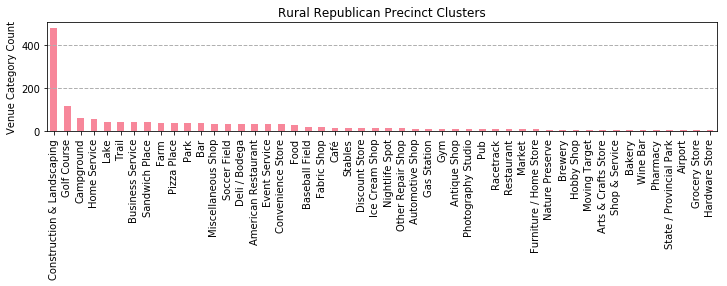

In [208]:
# plot highest occuring venue categories in each cluster
fig = counts_clust0[0:50].plot(kind='bar', 
                               figsize=[12,2],
                               color='xkcd:rose pink')

fig.set_title('Rural Republican Precinct Clusters')
fig.set_ylabel('Venue Category Count')
fig.grid(axis='y', linestyle='--', linewidth=1)
#ax = fig.set_yticks(np.arange(0,0.31,0.1))

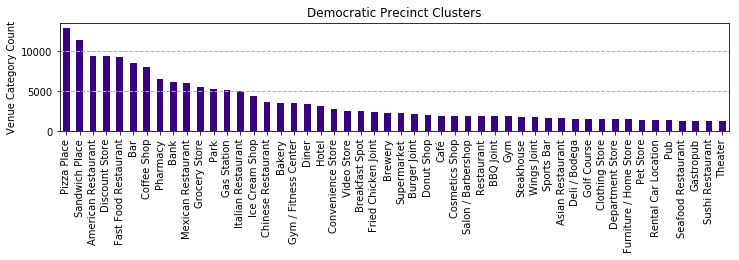

In [209]:
fig = counts_clust1[0:50].plot(kind='bar', 
                               figsize=[12,2],
                               color='xkcd:indigo')

fig.set_title('Democratic Precinct Clusters')
fig.set_ylabel('Venue Category Count')
fig.grid(axis='y', linestyle='--', linewidth=1)
#ax = fig.set_yticks(np.arange(0,0.31,0.1))

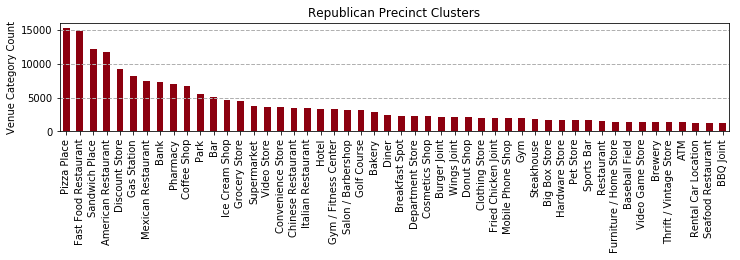

In [211]:
fig = counts_clust2[0:50].plot(kind='bar', 
                               figsize=[12,2],
                               color='xkcd:crimson')

fig.set_title('Republican Precinct Clusters')
fig.set_ylabel('Venue Category Count')
fig.grid(axis='y', linestyle='--', linewidth=1)
#ax = fig.set_yticks(np.arange(0,0.31,0.1))

In [212]:
# create dictionary of the 3 cluster frequencies
clust_dict = {'Cluster 0': freq_clust0.sort_index(), 
              'Cluster 1': freq_clust1.sort_index(), 
              'Cluster 2': freq_clust2.sort_index()
             } 

# combine into single dataframe
freq_clusters = pd.DataFrame(clust_dict) 

# create dataframes sorted by each of the two clusters
plotDem = freq_clusters.sort_values(by='Cluster 1', ascending=False)
plotRep = freq_clusters.sort_values(by='Cluster 2', ascending=False)

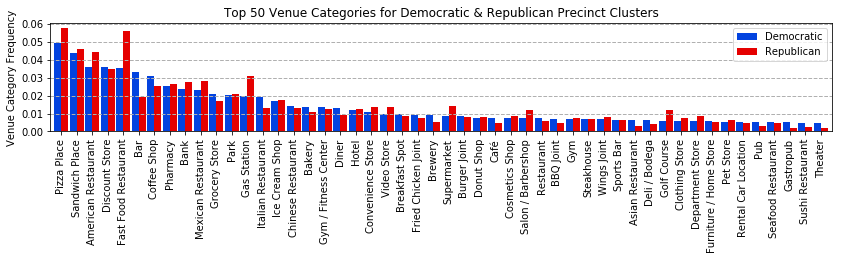

In [213]:
# plot top 50 most frequent venue categories in Democratic precints & corresponding Republican
fig = plotDem.iloc[0:50,1:].plot(kind='bar',
                                  width=0.9,
                                  figsize=[14,2],
                                  align='center',
                                  color=['xkcd:blue', 'xkcd:red']
                                    )

fig.set_title('Top 50 Venue Categories for Democratic & Republican Precinct Clusters')
fig.set_ylabel('Venue Category Frequency')
fig.legend(['Democratic', 'Republican'])
fig.grid(axis='y', linestyle='--', linewidth=1)
ax = fig.set_yticks(np.arange(0,0.061,0.01))

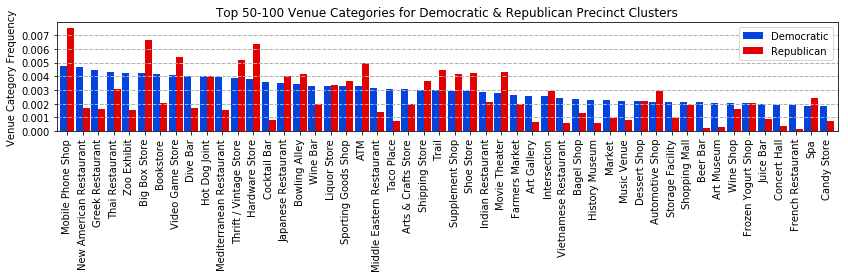

In [218]:
# plot top 50-100 most frequent venue categories in Democratic precints & corresponding Republican
fig = plotDem.iloc[50:100,1:].plot(kind='bar',
                                  width=0.9,
                                  figsize=[14,2],
                                  align='center',
                                  color=['xkcd:blue', 'xkcd:red']
                                    )

fig.set_title('Top 50-100 Venue Categories for Democratic & Republican Precinct Clusters')
fig.set_ylabel('Venue Category Frequency')
fig.legend(['Democratic', 'Republican'])
fig.grid(axis='y', linestyle='--', linewidth=1)
ax = fig.set_yticks(np.arange(0,0.008,0.001))

Calculate differences in frequency between Republican and Democratic clusters. Create bar chart of these maximum differences (i. raw, and ii. normalized relative to one of the two clusters) to illustrate where the two clusters diverge.

In [219]:
freq_diff = freq_clust1.subtract(freq_clust2).abs()

In [220]:
freq_diff.sort_values(ascending=False, inplace=True)

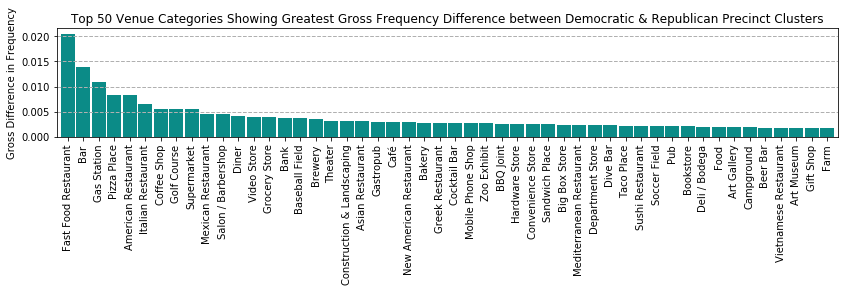

In [221]:
# plot venue categories showing greatest difference in frequency between Rep and Dem clusters
fig = freq_diff[0:50].plot(kind='bar',
                           width=0.9,
                           figsize=[14,2],
                           align='center',
                           color='xkcd:greenish blue'
                          )

fig.set_title('Top 50 Venue Categories Showing Greatest Gross Frequency Difference between Democratic & Republican Precinct Clusters')
fig.set_ylabel('Gross Difference in Frequency')
fig.grid(axis='y', linestyle='--', linewidth=1)
#ax = fig.set_yticks(np.arange(0,0.0081,0.002))

Next, divide one frequency cluster by the other. This will tell us *relative* difference in frequency of each venue category. Additionally, for venue categories with *relative* differences in frequency equal to zero or infinity, we know that the venue category only occurs in one of the two clusters (determined by which cluster we use as the denominator in the .divide() method below).

In [222]:
# divide the Republican by the Democratic
freq_norm = freq_clust2.sort_index().divide(freq_clust1.sort_index())

# sort values 
freq_norm.sort_values(ascending=False, inplace=True)

If the value is 'inf' then that particular venue does not exist in the Democratic cluster.

If the value is 'NaN' that that particular venue does not exist in either Democratic or Republican clusters. It only exists in other Republican cluster (which a secondary ultra-rural precinct cluster, 'Republican').

At a value of 1.0, there is venue catogory frequency parity. 

At a value of <1.0, the frequency of occurence of that particular venue category in the Republican cluster is a fraction of in the Democratic cluster. So it occurs more in Democratic precincts.

At a value of >1.0, that particular venue category occurs in the Republican cluster more often than the Democratic cluster. i.e. at a value of 2.0, the venue category occurs twice as much in Republican precincts than Democratic, etc. ...

**It's also pretty clear that the Foursquare database is not exhaustive. Probably for a variety of reasons, including that some types of venues are prone to being reviewed by customers or uploaded by the owner/manager.**

In [223]:
# number of venues only occuring in Republican precincts
np.sum(np.isinf(freq_norm))

57

In [224]:
# number of venues only in Democratic precincts
freq_norm.isin([0]).sum()

20

In [225]:
# number of venues occuring in neither cluster 0 or 1
np.sum(np.isnan(freq_norm))

2

In [226]:
# venue categories only occuring in Republican precincts
freq_norm[np.isinf(freq_norm)]

Arts & Entertainment           inf
Rock Climbing Spot             inf
Stationery Store               inf
Laser Tag                      inf
Strip Club                     inf
Kebab Restaurant               inf
Surf Spot                      inf
Hunan Restaurant               inf
Housing Development            inf
Hotel Pool                     inf
Medical School                 inf
Reservoir                      inf
Canal Lock                     inf
Himalayan Restaurant           inf
Hill                           inf
Apres Ski Bar                  inf
Car Wash                       inf
Government Building            inf
Lighting Store                 inf
Modern European Restaurant     inf
Tour Provider                  inf
Perfume Shop                   inf
Real Estate Office             inf
RV Park                        inf
Professional & Other Places    inf
Platform                       inf
Bath House                     inf
Bay                            inf
Photography Lab     

In [227]:
# venue categories only occuring in Democratic precincts
freq_norm[freq_norm.isin([0])]

Tibetan Restaurant          0.0
University                  0.0
Animal Shelter              0.0
Tram Station                0.0
College Baseball Diamond    0.0
Knitting Store              0.0
Taxi Stand                  0.0
Argentinian Restaurant      0.0
Astrologer                  0.0
Czech Restaurant            0.0
Street Food Gathering       0.0
Polish Restaurant           0.0
Capitol Building            0.0
Bavarian Restaurant         0.0
Plane                       0.0
Pedestrian Plaza            0.0
Belgian Restaurant          0.0
Music School                0.0
Hungarian Restaurant        0.0
College Track               0.0
dtype: float64

In [228]:
# venue categories more frequently found in Republican precincts
freq_norm[~np.isinf(freq_norm)][0:20]

Fishing Spot               27.697192
Fair                       23.938287
Assisted Living            22.751265
Resort                     22.091808
Rest Area                  21.457715
Hospital                   18.794523
Australian Restaurant      17.805338
Photography Studio         17.805338
Travel Agency              15.120406
IT Services                14.727872
Paintball Field            14.508053
Stables                    11.870225
North Indian Restaurant    11.870225
Forest                     11.870225
Pet Service                11.375632
Castle                      9.891854
Vacation Rental             8.902669
Toll Booth                  8.902669
Campground                  8.489278
Outdoors & Recreation       8.078348
dtype: float64

In [231]:
# number of venues only in Democratic precincts
nzero = freq_norm.isin([0]).sum()

# number of venues occuring in neither cluster 0 or 1
nnan = np.sum(np.isnan(freq_norm))

20
2


In [232]:
# venue categories more frequently found in Democratic precincts
freq_norm[-20-nzero-nnan:-nzero-nnan]

College Basketball Court           0.068220
Brazilian Restaurant               0.062896
Organic Grocery                    0.061398
Southern / Soul Food Restaurant    0.050628
Arepa Restaurant                   0.050212
Indie Theater                      0.048253
Herbs & Spices Store               0.042093
African Restaurant                 0.040651
Ramen Restaurant                   0.040375
Szechuan Restaurant                0.038792
Observatory                        0.036636
Persian Restaurant                 0.026735
Caribbean Restaurant               0.023552
Hostel                             0.023004
Distillery                         0.021982
Coworking Space                    0.021046
College Hockey Rink                0.018318
Turkish Restaurant                 0.012137
Roof Deck                          0.012063
Ethiopian Restaurant               0.008243
dtype: float64

In [233]:
# venue categories that occur in D/R precincts a frequency within 5% of each other...
freq_norm[freq_norm.between(0.95, 1.05, inclusive=True)]

Pharmacy                  1.043908
Scenic Lookout            1.034523
Donut Shop                1.033521
Park                      1.029903
Ice Cream Shop            1.022691
Frozen Yogurt Shop        1.020676
Liquor Store              1.015397
Multiplex                 1.014123
Dessert Shop              1.013228
Noodle House              1.012013
Gym                       1.010243
Steakhouse                1.002962
Hot Dog Joint             0.999519
Snack Place               0.995091
Burger Joint              0.993249
Post Office               0.989185
Beach                     0.978662
Weight Loss Center        0.978255
Furniture / Home Store    0.965366
Discount Store            0.964054
Auto Dealership           0.953857
Seafood Restaurant        0.953378
dtype: float64

The hightest values indicate venue categories that occur much more often in Republican precincts. The lowest values indicate venues that occur much more often in Democratic precincts. Looking below, we see 'Fishing Spot', 'Fair' and 'Rest Area' in the top 5. These are all indicative of rural areas. Further down, but still occuring around 10x as often than in Democratic precints, we see 'Stables', 'Forest', 'Toll Booth', 'Vacation Rental', 'Campground', 'Outdoor day & Recreation', etc. Although there are some categories that don't immediately conjure images of rural countryside, like 'Australian Restaurant', 'IT Services', 'North Indian Restaurant', it seems likely that this is an artifact of the Foursquare databases not necessarily containing all venues in existance AND the venue categories may potentially by redundant or inaccurate. It could be that there are as many 'North Indian Restaurant' in Democratic precincts, but they are listed under a venue category of merely 'Indian Restaurant'.

Now let's look at venue categories with the smallest normalized frequencies. Again, a value of 1 would mean venue category parity between Republican and Democratic precincts. So, very small values, closest to zero, would indicate venue categories than occur much more frequently in Democratic precincts. In the first plot, 'French Restaurant' has a value of ~0.1. This means that this venue category occurs in Republican districts 10% of the time that it occurs in Democratic precincts. In other words, 'French Restaurant' occurs in Democratic precincts 1/0.1=10 times more frequently than Republican districts.

This looks good, but let's take the reciprocal of the values below zero (Democratic precinct dominant), to get values that are congruent with the venue categories that are Republican precinct dominant.

In [234]:
# take the reciprocal
freq_norm_recip = 1 / freq_norm

freq_norm_recip.sort_values(ascending=False, inplace=True)

Creat horizontal bar charts with the highest normalized venue category frequencies for D/R clsuters facing away from each other.

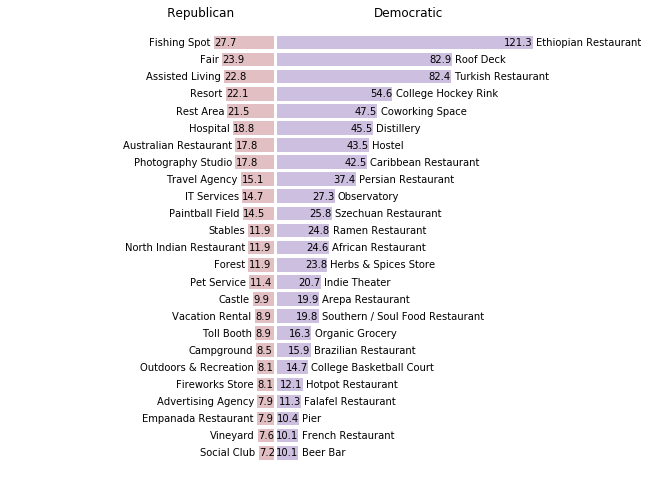

In [235]:
# configure figure
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=[10,7])

# number of bars to plot
nbars = 25

# bar opacity
baralpha = 0.25

# Republican on left
axes[0].barh(range(0,nbars), 
             freq_norm[~np.isinf(freq_norm)][0:nbars].sort_values(), 
             align='center', 
             color='xkcd:crimson',
             alpha=baralpha
            )

# Democratic on right
axes[1].barh(range(0,nbars), 
             freq_norm_recip[~np.isinf(freq_norm_recip)][0:nbars].sort_values(), 
             align='center', 
             color='xkcd:indigo',
             alpha=baralpha
            )

# Text category labels: Republican
for i, v in enumerate(freq_norm[~np.isinf(freq_norm)][0:nbars].sort_values()):
    axes[0].text(v + 1.5, 
                 i - 0.2, 
                 freq_norm[~np.isinf(freq_norm)][0:nbars].sort_values().index[i], 
                 horizontalalignment='right',
                 color='black')

# Text category labels: Democratic
for i, v in enumerate(freq_norm_recip[~np.isinf(freq_norm_recip)][0:nbars].sort_values()):
    axes[1].text(v + 1.5, 
                 i - 0.2, 
                 freq_norm_recip[~np.isinf(freq_norm_recip)][0:nbars].sort_values().index[i], 
                 horizontalalignment='left',
                 color='black')
    
# Text value labels: Republican
for i, v in enumerate(freq_norm[~np.isinf(freq_norm)][0:nbars].sort_values()):
    axes[0].text(v - 0.1, 
                 i - 0.2, 
                 str(np.round(freq_norm[~np.isinf(freq_norm)][0:nbars].sort_values()[i],1)), 
                 horizontalalignment='left',
                 color='black')
    
# Text value labels: Democratic
for i, v in enumerate(freq_norm_recip[~np.isinf(freq_norm_recip)][0:nbars].sort_values()):
    axes[1].text(v - 0.1, 
                 i - 0.2, 
                 str(np.round(freq_norm_recip[~np.isinf(freq_norm_recip)][0:nbars].sort_values()[i],1)), 
                 horizontalalignment='right',
                 color='black')

# invert left chart
axes[0].invert_xaxis()

# titles
axes[0].set(title='                              Republican')
axes[1].set(title='Democratic')

# layout
for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)
    
fig.tight_layout()
fig.subplots_adjust(wspace=0.01)

plt.yticks([])
axes[0].set_xticks(np.arange(0,121,20), minor=False) 
axes[1].set_xticks(np.arange(0,121,20), minor=False) 
axes[0].set_xticks([]) 
axes[1].set_xticks([]) 
# axes[0].set_xticklabels(np.arange(0,130,20), fontdict=None, minor=False)
# axes[1].set_xticklabels(np.arange(0,130,20), fontdict=None, minor=False)
axes[0].set_xticklabels([])
axes[1].set_xticklabels([])
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].spines['left'].set_visible(False)
axes[0].spines['bottom'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[1].spines['bottom'].set_visible(False)
axes[0].grid(False)
axes[1].grid(False)
# axes[0].axis('off')
# axes[1].axis('off')

plt.show()

#### Methodology: Classification algorthim set-up

The venue category information has provided some insight into the nature of Democratic and Republican precincts in Ohio. Now, classification algorithms will be used to ascertain the power of the venue catoregy data alone to predict the election results of Ohio voting precincts. The classification algortihms to be tested are Decision Trees (DT), K-Nearest Neighbors (KNN), Support Vector Machines (SVM), and Logistic Regression (LR). Parametric studies will be done for all four classification algorthims and the best results, in terms of the Jaccard Similarity Score, will be used in further analysis in the following sections.

But, first, the one-hot venue category information for all precincts must be split into training and testing datasets. (It should be noted that, unlike the preceding cluster data exploration work, the precinct election results are obviously **not** used in the feature set here. Rather, the precinct election results are the target category/classification data set.) Once these training/testing data sets have been created, they will be used to test the classification algorthims, without modification.

In [251]:
# Import and calculate Jaccard Similarity Score to be used for all algorithms
from sklearn.metrics import jaccard_similarity_score

# import accuray score (equal to jaccard_similarity_score function in this work)
from sklearn.metrics import accuracy_score

# Import f1-score to be used for all algorithms
from sklearn.metrics import classification_report

In [237]:
# find column indices for one-hot section of new df
j_start_class = df_merged.columns.get_loc("ATM")
j_end_class = df_merged.columns.get_loc("Zoo Exhibit")

# feature data set
X = df_merged.iloc[:,j_start_class:j_end_class+1].values

# target data set
y = df_merged["winner"]

# import library for train/test splitting
from sklearn.model_selection import train_test_split

# create training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [238]:
# check
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7206, 527)
(7206,)
(3089, 527)
(3089,)


#### Methodology: Classification w/ Decision Tree

In [252]:
# import Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

# Create list of DecisionTreeClassifier parameter: 'criterion'
critval = ['gini', 'entropy']
ncrit = len(critval)
# print('ncrit =',ncrit)
# for ic, crit in enumerate(critval):
#     print(ic, crit)
    
# Allocate arrays for mean and standard deviation for each 'criterion' value
mean_acc = np.zeros((ncrit))
std_acc = np.zeros((ncrit))
 
# Loop over 'criterion' options
for ic, crit in enumerate(critval):
        
    # Train Model and Predict  
    precinctTree = DecisionTreeClassifier(criterion=crit, max_depth=4)
    precinctTree.fit(X_train,y_train)
    predTree = precinctTree.predict(X_test)
    
    # Calculate mean accuracy score and standard deviation
    mean_acc[ic] = metrics.accuracy_score(y_test, predTree)
    std_acc[ic] = np.std(predTree==y_test)/np.sqrt(predTree.shape[0])
#     print(ic, crit, mean_acc[ic], std_acc[ic])

# use best parameter configuration to create final model & report score
print('The best parameter(s) for the Decision Tree Classifier is/are:\n',critval[np.argmax(mean_acc)])
precinctTree = DecisionTreeClassifier(criterion=critval[np.argmax(mean_acc)], max_depth=4)
precinctTree.fit(X_train,y_train)
predTree = precinctTree.predict(X_test)

# Jaccard Similarity Score
print('Jaccard Similariy Score =',jaccard_similarity_score(y_test, predTree))

print("Train set Accuracy:", metrics.accuracy_score(y_train, precinctTree.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, predTree))

# f1-score report
print (classification_report(y_test, predTree))

The best parameter(s) for the Decision Tree Classifier is/are:
 gini
Jaccard Similariy Score = 0.8028488183878277
Train set Accuracy:  0.8075215098529004
Test set Accuracy:  0.8028488183878277
                           precision    recall  f1-score   support

 pres_16_donald_j_trump_r       0.87      0.85      0.86      2162
pres_16_hillary_clinton_d       0.66      0.70      0.68       927

                micro avg       0.80      0.80      0.80      3089
                macro avg       0.77      0.77      0.77      3089
             weighted avg       0.81      0.80      0.80      3089



The Decision Tree classifier is able to predict the 2016 Presidential election results of Ohio voting precincts at about 80.2% accuracy.

#### Methodology: Classification w/ K-Nearest Neighbors

The best parameter(s) for the KNN Classifier is/are:
 2


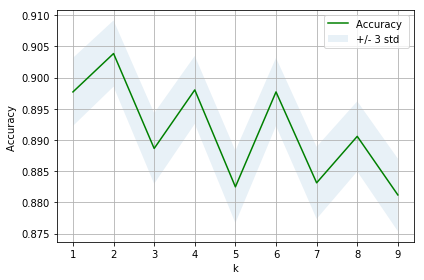

Jaccard Similariy Score = 0.8028488183878277
Train set Accuracy:  0.956563974465723
Test set Accuracy:  0.9038523794108125
                           precision    recall  f1-score   support

 pres_16_donald_j_trump_r       0.91      0.95      0.93      2162
pres_16_hillary_clinton_d       0.88      0.79      0.83       927

                micro avg       0.90      0.90      0.90      3089
                macro avg       0.90      0.87      0.88      3089
             weighted avg       0.90      0.90      0.90      3089



In [256]:
# Import KNN
from sklearn.neighbors import KNeighborsClassifier

# k-values to test...
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

# Loop over k-values
for n in range(1,Ks):
    
    # Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat_KNN = neigh.predict(X_test)
    
    # Calculate mean accuracy score and standard deviation    
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat_KNN)
    std_acc[n-1]=np.std(yhat_KNN==y_test)/np.sqrt(yhat_KNN.shape[0])

# use best parameter configuration to create final model & report score
print('The best parameter(s) for the KNN Classifier is/are:\n',np.argmax(mean_acc)+1)

# plot model accuracy as a function k
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3 std'))
plt.ylabel('Accuracy ')
plt.xlabel('k')
plt.tight_layout()
plt.grid()
plt.show()

# re-train Model and Predict w/ most accurate number of neighbors
n = mean_acc.argmax() + 1
neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
yhat_KNN = neigh.predict(X_test)

# Jaccard Similarity Score
print('Jaccard Similariy Score =',jaccard_similarity_score(y_test, predTree))

print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_KNN))

# f1-score report
print (classification_report(y_test, yhat_KNN))

The KNN classifier is able to predict the 2016 Presidential election results of Ohio voting precincts at about 90.4% accuracy.

#### Methodology: Classification w/ Support Vector Machine

In [263]:
# Import SVM
from sklearn import svm

# SVM has four callable 'kernel' options: ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’
# ** & 'poly' can be further modified by the 'degree' parameter (default=3)

# Create list of SVM 'kernel' parameter
kernval = ['linear', 'poly', 'rbf', 'sigmoid']
nkern = len(kernval)

# Test different degree 'poly' kernels, not just the default degree=3...
ndegree = 10

# Allocate arrays for mean and standard deviation for each 'kernel' value
mean_acc = np.zeros((nkern))

# Loop over 'criterion' options
for ik, kern in enumerate(kernval):
    
    # Test 1-->ndegree different 'poly' kernels
    if (kern=='poly'):
                
        # loop over poly degrees
        for ideg in range(1,ndegree+1):
            
            # Train Model and Predict  
            svm_prec = svm.SVC(kernel=kern, degree=ideg, gamma='auto')
            svm_prec.fit(X_train, y_train)
            yhat_SVM = svm_prec.predict(X_test)

            # Calculate mean accuracy score and standard deviation & keep best fit so far
            if (ideg==1):
                mean_acc[ik] = metrics.accuracy_score(y_test, yhat_SVM)
            else:
                mean_acc[ik] = np.maximum(mean_acc[ik-1], metrics.accuracy_score(y_test, yhat_SVM))
        
    # Test all other non-'poly' kernels
    else:
        
        # Train Model and Predict  
        svm_prec = svm.SVC(kernel=kern, gamma='auto')
        svm_prec.fit(X_train, y_train)
        yhat_SVM = svm_prec.predict(X_test)
    
        # Calculate mean accuracy score and standard deviation
        mean_acc[ik] = metrics.accuracy_score(y_test, yhat_SVM)
        
# use best parameter configuration to create final model & report score
print('The best parameter(s) for the SVM Classifier is/are:\n',kernval[np.argmax(mean_acc)])

# re-train Model and Predict w/ optimal parameters
svm_prec = svm.SVC(kernel=kernval[np.argmax(mean_acc)], gamma='auto')
svm_prec.fit(X_train, y_train)
yhat_SVM = svm_prec.predict(X_test)        

# Jaccard Similarity Score
print('Jaccard Similariy Score =',jaccard_similarity_score(y_test, predTree))

print("Train set Accuracy:", metrics.accuracy_score(y_train, svm_prec.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_SVM))

# f1-score report
print (classification_report(y_test, yhat_SVM))

Jaccard Similariy Score = 0.8028488183878277
Train set Accuracy:  0.7549264501804053
Test set Accuracy:  0.765943671090968
                           precision    recall  f1-score   support

 pres_16_donald_j_trump_r       0.75      0.99      0.86      2162
pres_16_hillary_clinton_d       0.89      0.25      0.39       927

                micro avg       0.77      0.77      0.77      3089
                macro avg       0.82      0.62      0.62      3089
             weighted avg       0.79      0.77      0.72      3089



The SVM classifier is able to predict the 2016 Presidential election results of Ohio voting precincts at about 76.6% accuracy.

#### Methodology: Classification w/ Logistic Regression

In [272]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# LogisticRegression has many parameters. We will focus on regularization strength C, and solver:
# C = 0.001, 0.01, 0.1, 1.0, 10.0, 100.0
# solver = 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'

# Create list of 'solver' parameter
solvval = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
nsolv = len(solvval)

# Test different regularization strengths 'C' (logistic)
regC = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
nC = len(regC)

# Allocate arrays for mean and standard deviation for each 'kernel' value
mean_acc = np.zeros((nsolv,nC))
std_acc = np.zeros((nsolv,nC))
 
# Loop over 'solver' options
for isolv, solv in enumerate(solvval):
    
    # Loop over regularization strengths
    for iC, C in enumerate(regC):
        
        # Train Model and Predict  
        LR = LogisticRegression(C=C, solver=solv, max_iter=10000)
        LR.fit(X_train, y_train)
        yhat_LR = LR.predict(X_test)
    
        # Calculate mean accuracy score and standard deviation
        mean_acc[isolv,iC] = metrics.accuracy_score(y_test, yhat_LR)
        std_acc[isolv,iC] = np.std(yhat_LR==y_test)/np.sqrt(yhat_LR.shape[0])

# use best parameter configuration to create final model & report score
print('The best parameter(s) for the LR Classifier is/are:\n',solvval[0],'\n',regC[mean_acc.argmax()])
    
# re-train Model and Predict w/ optimum parametes
LR = LogisticRegression(C=regC[mean_acc.argmax()], solver=solvval[0], max_iter=10000)
LR.fit(X_train, y_train)
yhat_LR = LR.predict(X_test)
                               
# Jaccard Similarity Score
print('Jaccard Similariy Score =',jaccard_similarity_score(y_test, yhat_LR))

print("Train set Accuracy: ", metrics.accuracy_score(y_train, LR.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_LR))

# f1-score report
print (classification_report(y_test, yhat_LR))

# Import and calculate log-loss
from sklearn.metrics import log_loss
print('Log Loss =',log_loss(y_test, yhat_LR_prob))

The best parameter(s) for the LR Classifier is/are:
 newton-cg 
 10000.0
Jaccard Similariy Score = 0.8769828423438005
Train set Accuracy:  0.8942547876769359
Test set Accuracy:  0.8769828423438005
                           precision    recall  f1-score   support

 pres_16_donald_j_trump_r       0.90      0.93      0.91      2162
pres_16_hillary_clinton_d       0.82      0.76      0.79       927

                micro avg       0.88      0.88      0.88      3089
                macro avg       0.86      0.84      0.85      3089
             weighted avg       0.88      0.88      0.88      3089



The LR classifier is able to predict the 2016 Presidential election results of Ohio voting precincts at about 87.7% accuracy.

#### Methodology: Feature selection

Although this is a pretty small data set (roughly 10,000 precincts with roughly 500 features each), there still may be some merit in examining the feature set for redundant and/or irrelevant features. These features can be omitted from the analysis, which can make results easier to understand, reduce computational times (for larger data sets in particular), and limit reduce model variance (overfitting to training data).

#### Methodology: Feature selection by food-only related venues

There are many ways to employ feature selection. The most basic and blunt-force approach is to manually select a subset of features. In this work, two manual selections are made and tested. The first is food-only related venue categories. The second is all non-food related venue categories. Both subsets are used with the best performing classification algorithm (k-nearest neighbors w/ k=2), and the results are shown below.

In [273]:
# make copy of full dataframe
df_food = df_merged

# find column indices for one-hot section of new df
jf_start = df_food.columns.get_loc("ATM")
jf_end = df_food.columns.get_loc("Zoo Exhibit")

colNames = df_food.columns[df_food.columns.str.contains(pat = "Restaurant|BBQ|Bagel|Bakery|Breakfast|Bistro|Tea|Bar|Beer|Brewery|Buffet|Burger|"
           "Burrito|Butcher|Cafeteria|Café\|Cafe|Candy|Cheese|Chocolate|Coffee|Convenience"
           "Cupcake|Deli|Bodega|Dessert|Dim Sum|Diner|Donut|Farm|Market|Fast Food|Fish|"
           "Food|Drink|Chicken|Yogurt|Fruit|Vegetable|Gastropub|Gourmet|Grocery|Hot Dog|"
           "Ice Cream|Pub|Juice|Liquor|Noodle|Pie|Pizza|Poke|Salad|Sandwich|Smoothie|Snack|"
           "Soup|Speakeasy|Steakhouse|Supermarket|Taco|Vineyard|Wine|Winery|Wings")]

# create dataframe of one-hot food-only features
food_onehot = df_food[colNames]

# split reduced feature set into new training and testing datasets
Xf = food_onehot.values
yf = df_merged["winner"]
Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf, yf, test_size=0.3, random_state=3)

# apply KNN w/ k=2
n = 2
neigh_food = KNeighborsClassifier(n_neighbors = n).fit(Xf_train,yf_train)
yhat_KNN_food = neigh_food.predict(Xf_test)

# results
print("Train set Accuracy: ", metrics.accuracy_score(yf_train, neigh_food.predict(Xf_train)))
print("Test set Accuracy: ", metrics.accuracy_score(yf_test, yhat_KNN_food))
print (classification_report(yf_test, yhat_KNN_food))

Train set Accuracy:  0.9537885095753539
Test set Accuracy:  0.8967303334412431
                           precision    recall  f1-score   support

 pres_16_donald_j_trump_r       0.90      0.96      0.93      2162
pres_16_hillary_clinton_d       0.88      0.76      0.81       927

                micro avg       0.90      0.90      0.90      3089
                macro avg       0.89      0.86      0.87      3089
             weighted avg       0.90      0.90      0.89      3089



The KNN classifier with the full feature set had a test set accoracy of 90.4%.

The KNN classifier with the food-only feature set had a test set accoracy of 89.6%. So, only a small loss in accuracy is observed.

#### Methodology: Feature selection by non-food related venues

In [274]:
# make copy 
df_notfood = df_merged

# generate column names of venue categories that are NOT food related
colNamesNot = df_notfood.iloc[0:1,jf_start:jf_end+1].columns[~df_notfood.iloc[0:1,jf_start:jf_end+1].columns.str.contains(pat = "Restaurant|BBQ|Bagel|Bakery|Breakfast|Bistro|Tea|Bar|Beer|Brewery|Buffet|Burger|"
           "Burrito|Butcher|Cafeteria|Café\|Cafe|Candy|Cheese|Chocolate|Coffee|Convenience"
           "Cupcake|Deli|Bodega|Dessert|Dim Sum|Diner|Donut|Farm|Market|Fast Food|Fish|"
           "Food|Drink|Chicken|Yogurt|Fruit|Vegetable|Gastropub|Gourmet|Grocery|Hot Dog|"
           "Ice Cream|Pub|Juice|Liquor|Noodle|Pie|Pizza|Poke|Salad|Sandwich|Smoothie|Snack|"
           "Soup|Speakeasy|Steakhouse|Supermarket|Taco|Vineyard|Wine|Winery|Wings")]

# one-hot df of all NON-food related venue categories
notfood_onehot = df_notfood[colNamesNot]

# split reduced feature set into new training and testing datasets
Xnf = notfood_onehot.values
ynf = df_merged["winner"]
Xnf_train, Xnf_test, ynf_train, ynf_test = train_test_split(Xnf, ynf, test_size=0.3, random_state=3)

# apply KNN w/ k=2
n = 2
neigh_notfood = KNeighborsClassifier(n_neighbors = n).fit(Xnf_train,ynf_train)
yhat_KNN_notfood = neigh_notfood.predict(Xnf_test)

# results
print("Train set Accuracy: ", metrics.accuracy_score(ynf_train, neigh_notfood.predict(Xnf_train)))
print("Test set Accuracy: ", metrics.accuracy_score(ynf_test, yhat_KNN_notfood))
print (classification_report(ynf_test, yhat_KNN_notfood))

Train set Accuracy:  0.9571190674437968
Test set Accuracy:  0.9038523794108125
                           precision    recall  f1-score   support

 pres_16_donald_j_trump_r       0.91      0.96      0.93      2162
pres_16_hillary_clinton_d       0.89      0.78      0.83       927

                micro avg       0.90      0.90      0.90      3089
                macro avg       0.90      0.87      0.88      3089
             weighted avg       0.90      0.90      0.90      3089



The KNN classifier with the full feature set had a test set accoracy of 90.4%.

The KNN classifier with the non-food feature set *also* had a test set accuracy of 90.4%. So, it would appear that food-only, non-food, and full feature sets all produce very similar results. Perhaps, it could be said that the food-only features are redundant to the non-food features. But, beyond the data exploration already done in previous sections, there is not much more manual exploration of the venue categories to do. However, other techniques can be leveraged to give some insight into which venue categories are most influential on the classification model's predictive capability.

#### Methodology: Feature selection by Correlation Feature Analysis (CFA)

This methodology is based on the idea features that are worth keeping are highly correlated the classification category, but not with other features. In other words, only keep features that have a big effect on the classification, and eliminate features that have a big effect on other features, since they are redundant.

In [275]:
# create dataframe with one-hot features 
Xycorr = df_merged.iloc[:,jf_start:jf_end+1]

# add binary 0/1 classification column
Xycorr['winner_binary'] = df_merged['winner_binary']

# create correlation matrix
corrmatrix = Xycorr.corr()

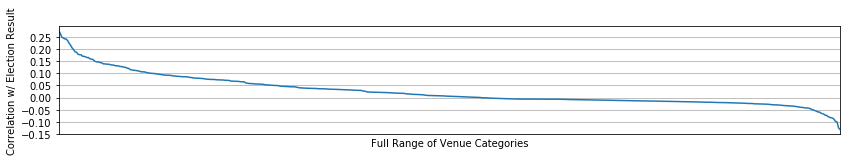

In [279]:
# plot correlation of the classification category w/ all other features
fig = corrmatrix.iloc[-1,:].sort_values(ascending=False)[1:].plot(kind='line', figsize=[14,2])
plt.grid(True)
plt.xticks([])
fig.set_xlabel('Full Range of Venue Categories')
fig.set_ylabel('Correlation w/ Election Result')
fig.xaxis.tick_bottom()
ax = fig.set_yticks(np.arange(-0.15,0.3,0.05))

Since there are so many features, this plot does not help much. Another way to get some insight into the correlation matrix is to produce a heatmap figure. However, since we have over 500 features and the correlation matrix is (528,528), it will be difficult to see what's going on. Therefore, two (50,50) heatmaps are generated, focusing on the highest absolute correlation values at each end of the figure above.

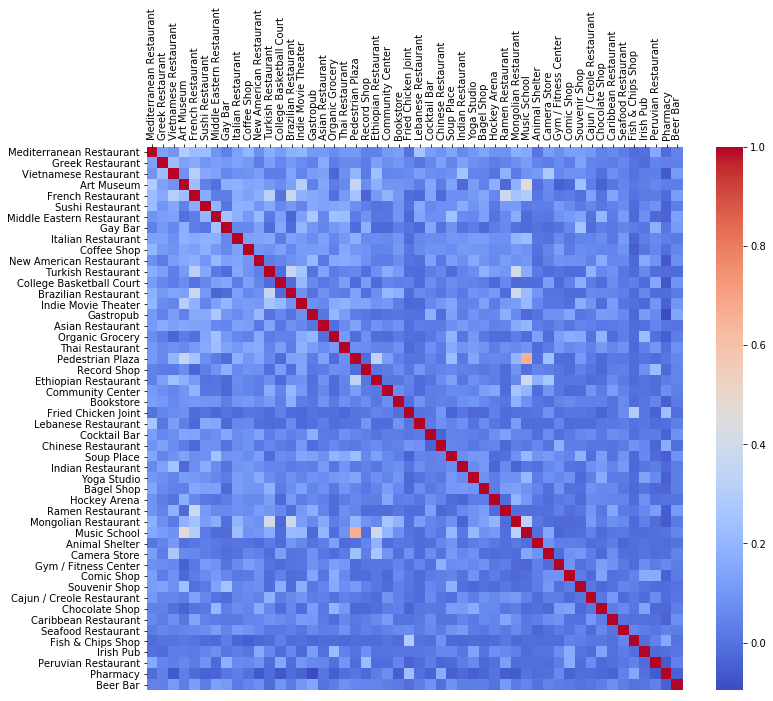

In [291]:
# import library to generate heatmap of correlation matrix
import seaborn as sns

# Top 50 Venue Categories Correlated w/ Democratic Precincts
plt.figure(figsize=(12,10))
fig = sns.heatmap(corrmatrix.sort_values(by=['winner_binary'], axis=0, ascending=False).sort_values(by=['winner_binary'], axis=1, ascending=False).iloc[1:51,1:51], 
                  cmap='coolwarm')
fig.xaxis.tick_top()
plt.xticks(rotation=90)
plt.show()

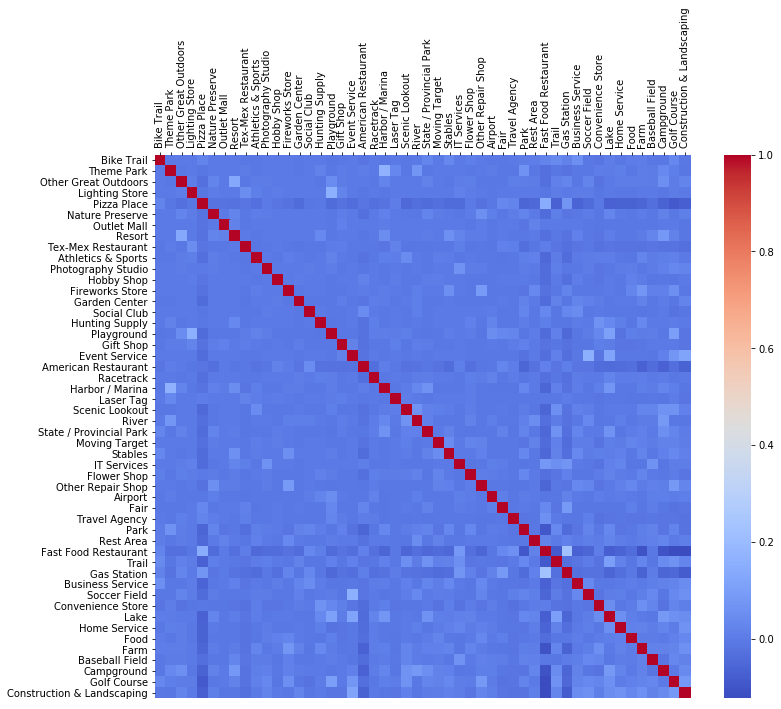

In [290]:
# Top 50 Venue Categories Correlated w/ Republican Precincts
plt.figure(figsize=(12,10))
fig = sns.heatmap(corrmatrix.sort_values(by=['winner_binary'], axis=0, ascending=False).sort_values(by=['winner_binary'], axis=1, ascending=False).iloc[-50:,-50:], 
                  cmap='coolwarm')
fig.xaxis.tick_top()
plt.xticks(rotation=90)
plt.show()

The heatmaps show some higher correlation values between features, which could be be filtered out of the feature set by setting a correlation threshold. Then, only features which have low correlation with all other features would remain. Before any features are filtered out, the correlation matrix can provide more insight on the nature of the Democratic and Republican precincts. The following code produces a figure that better visualizes which venue categories are most highly correlated with each precinct classification.

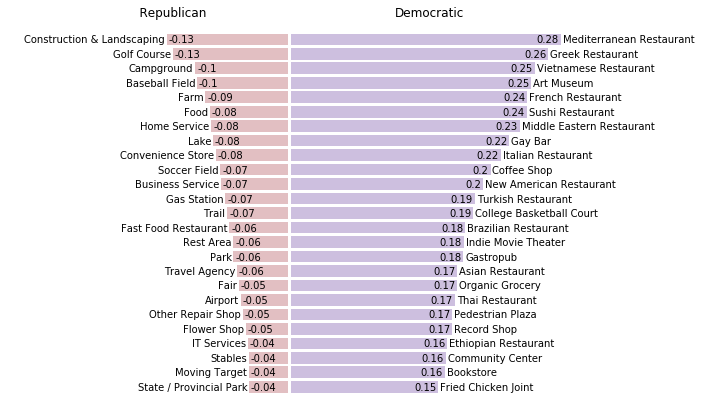

In [277]:
# plot top 50 most venue categories correlated with both Dem and Rep precincts
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=[10,7])

# number of bars to plot
nbars = 25

# bar opacity
baralpha = 0.25

# dataframes to be plotted
corr_rep = corrmatrix.iloc[-1,:].sort_values(ascending=False)[-nbars:]
corr_dem = corrmatrix.iloc[-1,:].sort_values(ascending=False)[1:nbars+1].sort_values()

# Republican on left
axes[0].barh(range(0,nbars), 
             corr_rep, 
             align='center', 
             color='xkcd:crimson',
             alpha=baralpha
            )

# Democratic on right
axes[1].barh(range(0,nbars), 
             corr_dem, 
             align='center', 
             color='xkcd:indigo',
             alpha=baralpha
            )

# Text category labels: Republican
for i, v in enumerate(corr_rep):
    axes[0].text(v - 0.002, 
                 i - 0.25, 
                 corr_rep.index[i], 
                 horizontalalignment='right',
                 color='black')

# Text category labels: Democratic
for i, v in enumerate(corr_dem):
    axes[1].text(v + 0.002, 
                 i - 0.25, 
                 corr_dem.index[i], 
                 horizontalalignment='left',
                 color='black')
    
# Text value labels: Republican
for i, v in enumerate(corr_rep):
    axes[0].text(v + 0.002, 
                 i -0.25, 
                 str(np.round(corr_rep[i],2)), 
                 horizontalalignment='left',
                 color='black')
    
# Text value labels: Democratic
for i, v in enumerate(corr_dem):
    axes[1].text(v - 0.002, 
                 i - 0.25, 
                 str(np.round(corr_dem[i],2)), 
                 horizontalalignment='right',
                 color='black')

# titles
axes[0].set(title='            Republican')
axes[1].set(title='Democratic')

# layout
for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)
    
#fig.tight_layout()
fig.subplots_adjust(wspace=0.01)

plt.yticks([])
axes[0].set_xticks(np.arange(-0.3,0,0.1), minor=False) 
axes[1].set_xticks(np.arange(0,0.3,0.1), minor=False) 
axes[0].set_xticks([]) 
axes[1].set_xticks([]) 
axes[0].set_xticklabels([])
axes[1].set_xticklabels([])
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].spines['left'].set_visible(False)
axes[0].spines['bottom'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[1].spines['bottom'].set_visible(False)
axes[0].grid(False)
axes[1].grid(False)

plt.show()

The figure shows the venue categories most highly correlated with Republican precincts (left hand side) and Democratic precincts (right hand side). The venues most correlated with Republican precincts do fit the *rural* stereotype: 'Construction & Landscaping', 'Campground', 'Farm', 'Lake'. Although some of the categories are ambiguous. The venues most closely correlated with Democratic precincts fit the *urban* stereotype. In the top ten are a variety of ethnic restaurant (including 'French Restaurant'), 'Art Museum', and 'Gay Bar'. So, it's pretty safe to say that Republican precincts are pretty well approximated by the rural designation, and Democratic precincts are well described by the urban designation.

Rather than continue with this CFA, and somewhat bluntly filtering features with a correlation threshold, the following section will instead employ a more elegant approach.

#### Methodology: Feature selection by Chi-Squared Independence Test

The Chi-Squared test is employed here to select the *n* "best" features from the feature set. This approach is tested by trimming the whole feature set down to a few different values of n (n=20,50,100). Each of these reduced feature sets are used with the KNN algorithm and the accuracies are compared. The idea is to reduce the number of features as much as possible, while miitigating the effect on accuracy.

In [292]:
# import library for feature selection
from sklearn.feature_selection import SelectKBest, chi2

# do this in parts to isolate the "selector" allowing us to retrieve feature names
selector20 = SelectKBest(chi2, k=20)
selector20.fit(X, y)
X_chi20 = selector20.transform(X)

# get names of features (venue categories) that were deemed "best"
top20venues = df_merged.iloc[:,j_start_class:j_end_class+1].columns[selector20.get_support(indices=True)].tolist()

# create training and testing data sets
Xchi20_train, Xchi20_test, ychi20_train, ychi20_test = train_test_split(X_chi20, y, test_size=0.3, random_state=3)

# run KNN on new feature set
n = 2
neigh_chi20 = KNeighborsClassifier(n_neighbors = n).fit(Xchi20_train,ychi20_train)
yhat_KNN_chi20 = neigh_chi20.predict(Xchi20_test)

# results
print("Train set Accuracy: ", metrics.accuracy_score(ychi20_train, neigh_chi20.predict(Xchi20_train)))
print("Test set Accuracy: ", metrics.accuracy_score(ychi20_test, yhat_KNN_chi20))
print (classification_report(ychi20_test, yhat_KNN_chi20))

Train set Accuracy:  0.9023036358590064
Test set Accuracy:  0.8297183554548397
                           precision    recall  f1-score   support

 pres_16_donald_j_trump_r       0.83      0.95      0.89      2162
pres_16_hillary_clinton_d       0.82      0.56      0.66       927

                micro avg       0.83      0.83      0.83      3089
                macro avg       0.83      0.75      0.77      3089
             weighted avg       0.83      0.83      0.82      3089



In [296]:
# find and use top 50 features
selector50 = SelectKBest(chi2, k=50)
selector50.fit(X, y)
X_chi50 = selector50.transform(X)
top50venues = df_merged.iloc[:,j_start_class:j_end_class+1].columns[selector50.get_support(indices=True)].tolist()
Xchi50_train, Xchi50_test, ychi50_train, ychi50_test = train_test_split(X_chi50, y, test_size=0.3, random_state=3)
n = 2
neigh_chi50 = KNeighborsClassifier(n_neighbors = n).fit(Xchi50_train,ychi50_train)
yhat_KNN_chi50 = neigh_chi50.predict(Xchi50_test)

print("Train set Accuracy: ", metrics.accuracy_score(ychi50_train, neigh_chi50.predict(Xchi50_train)))
print("Test set Accuracy: ", metrics.accuracy_score(ychi50_test, yhat_KNN_chi50))
print(jaccard_similarity_score(ychi50_test, yhat_KNN_chi50))
print (classification_report(ychi50_test, yhat_KNN_chi50))

Train set Accuracy:  0.8960588398556758
Test set Accuracy:  0.8484946584655229
0.8484946584655229
                           precision    recall  f1-score   support

 pres_16_donald_j_trump_r       0.89      0.90      0.89      2162
pres_16_hillary_clinton_d       0.75      0.73      0.74       927

                micro avg       0.85      0.85      0.85      3089
                macro avg       0.82      0.82      0.82      3089
             weighted avg       0.85      0.85      0.85      3089



In [294]:
# find and use top 100 features
selector100 = SelectKBest(chi2, k=100)
selector100.fit(X, y)
X_chi100 = selector100.transform(X)
top100venues = df_merged.iloc[:,j_start_class:j_end_class+1].columns[selector100.get_support(indices=True)].tolist()
Xchi100_train, Xchi100_test, ychi100_train, ychi100_test = train_test_split(X_chi100, y, test_size=0.3, random_state=3)
n = 2
neigh_chi100 = KNeighborsClassifier(n_neighbors = n).fit(Xchi100_train,ychi100_train)
yhat_KNN_chi100 = neigh_chi100.predict(Xchi100_test)

print("Train set Accuracy: ", metrics.accuracy_score(ychi100_train, neigh_chi100.predict(Xchi100_train)))
print("Test set Accuracy: ", metrics.accuracy_score(ychi100_test, yhat_KNN_chi100))
print(jaccard_similarity_score(ychi100_test, yhat_KNN_chi100))
print (classification_report(ychi100_test, yhat_KNN_chi100))

Train set Accuracy:  0.951706910907577
Test set Accuracy:  0.9035286500485594
0.9035286500485594
                           precision    recall  f1-score   support

 pres_16_donald_j_trump_r       0.91      0.96      0.93      2162
pres_16_hillary_clinton_d       0.90      0.77      0.83       927

                micro avg       0.90      0.90      0.90      3089
                macro avg       0.90      0.86      0.88      3089
             weighted avg       0.90      0.90      0.90      3089



The KNN classifier with the full feature set had a test set accoracy of 90.4%.

The chi-squared test results of n=(20,50,100) produced KNN accuracies of 83.0%, 84.8%, and 90.4%, respectively. So, it's fair to say that the top 100 venues produced by the chi-squared test are good indicators of the way an Ohio precinct voted in the 2016 Presidential election. This is illustrated in the following figure.

In [ ]:
# word cloud in shape of Ohio (red=Republican words, blue=Democratic words)

In [307]:
print(type(chi2(X, y)))
chi2(X, y)

<class 'tuple'>


(array([9.33389469e-02, 2.91781838e-02, 5.36360936e-01, 1.64363509e-01,
       1.55680135e+00, 6.34415765e+00, 2.17035727e-01, 2.65775578e-01,
       6.67365024e-04, 1.13324028e+00, 3.10817164e-01, 2.49354557e+00,
       1.32681510e+00, 4.68701093e-02, 1.09053561e-01, 6.03835892e-01,
       1.70950024e+00, 6.86111111e-01, 5.03816266e+00, 1.04169097e+01,
       6.69296924e-02, 1.63967611e-01, 9.78799092e+00, 3.68979681e-01,
       4.57407407e-02, 2.03223148e+00, 7.17984662e-01, 4.21582973e-03,
       5.58630583e-01, 3.58651463e-01, 1.58899750e-01, 6.06296248e+00,
       3.39318487e-01, 4.66257102e+00, 4.74883537e+00, 2.01179790e+00,
       6.62212307e+00, 1.81350155e+01, 2.01352621e-01, 1.54681262e-01,
       9.37625694e-01, 4.37246964e-01, 1.24498798e+00, 1.09311741e-01,
       1.09372415e+00, 4.32205413e-01, 1.19162621e+00, 6.85245853e+00,
       2.15834614e-03, 1.03256811e+00, 1.14351852e-01, 4.09292133e-02,
       9.69842330e-04, 7.14223570e-02, 8.33864614e-01, 5.24719935e-01,
     

In [308]:
len(chi2(X, y))

2

In [314]:
len(chi2(X, y)[:][0])

527

In [313]:
len(chi2(X, y)[0][:])

527

In [315]:
chi2(X, y)[0][:]

array([9.33389469e-02, 2.91781838e-02, 5.36360936e-01, 1.64363509e-01,
       1.55680135e+00, 6.34415765e+00, 2.17035727e-01, 2.65775578e-01,
       6.67365024e-04, 1.13324028e+00, 3.10817164e-01, 2.49354557e+00,
       1.32681510e+00, 4.68701093e-02, 1.09053561e-01, 6.03835892e-01,
       1.70950024e+00, 6.86111111e-01, 5.03816266e+00, 1.04169097e+01,
       6.69296924e-02, 1.63967611e-01, 9.78799092e+00, 3.68979681e-01,
       4.57407407e-02, 2.03223148e+00, 7.17984662e-01, 4.21582973e-03,
       5.58630583e-01, 3.58651463e-01, 1.58899750e-01, 6.06296248e+00,
       3.39318487e-01, 4.66257102e+00, 4.74883537e+00, 2.01179790e+00,
       6.62212307e+00, 1.81350155e+01, 2.01352621e-01, 1.54681262e-01,
       9.37625694e-01, 4.37246964e-01, 1.24498798e+00, 1.09311741e-01,
       1.09372415e+00, 4.32205413e-01, 1.19162621e+00, 6.85245853e+00,
       2.15834614e-03, 1.03256811e+00, 1.14351852e-01, 4.09292133e-02,
       9.69842330e-04, 7.14223570e-02, 8.33864614e-01, 5.24719935e-01,
      

In [316]:
df_merged.iloc[:,j_start_class:j_end_class+1].columns[selector20.get_support(indices=True)].tolist()

Index(['Art Museum', 'Asian Restaurant', 'Baseball Field', 'Business Service',
       'Campground', 'Cocktail Bar', 'Coffee Shop',
       'Construction & Landscaping', 'Farm', 'Food', 'Gastropub',
       'Golf Course', 'Greek Restaurant', 'Home Service', 'Italian Restaurant',
       'Lake', 'Mediterranean Restaurant', 'New American Restaurant',
       'Soccer Field', 'Zoo Exhibit'],
      dtype='object')

In [336]:
df_merged.iloc[:,j_start_class:j_end_class+1].columns[selector20.get_support(indices=True)]

Index(['Art Museum', 'Asian Restaurant', 'Baseball Field', 'Business Service',
       'Campground', 'Cocktail Bar', 'Coffee Shop',
       'Construction & Landscaping', 'Farm', 'Food', 'Gastropub',
       'Golf Course', 'Greek Restaurant', 'Home Service', 'Italian Restaurant',
       'Lake', 'Mediterranean Restaurant', 'New American Restaurant',
       'Soccer Field', 'Zoo Exhibit'],
      dtype='object')

In [317]:
type(df_merged.iloc[:,j_start_class:j_end_class+1].columns[selector20.get_support(indices=True)])

<class 'pandas.core.indexes.base.Index'>

In [321]:
chi2(X, y)[0][selector20.get_support(indices=True)]

array([10.41690965,  9.78799092, 18.13501555, 18.26742347, 38.83739845,
       10.11494318, 16.50798721, 59.84632019, 29.21979419, 22.07560721,
       10.40558098, 28.18664641, 12.23796042, 24.92344964, 21.06895872,
       15.30099633, 11.44080935,  9.94538528, 10.30357426, 10.62741713])

In [335]:
df_chi2 = pd.DataFrame(chi2(X, y)[0][selector20.get_support(indices=True)])
df_chi2.rename(columns={0:'chi2'}, inplace=True)
df_chi2

,chi2
0,10.416910
1,9.787991
2,18.135016
3,18.267423
4,38.837398
5,10.114943
6,16.507987
7,59.846320
8,29.219794
9,22.075607


In [338]:
chi2_venues = df_merged.iloc[:,j_start_class:j_end_class+1].columns[selector20.get_support(indices=True)].tolist()
chi2_venues

['Art Museum', 'Asian Restaurant', 'Baseball Field', 'Business Service', 'Campground', 'Cocktail Bar', 'Coffee Shop', 'Construction & Landscaping', 'Farm', 'Food', 'Gastropub', 'Golf Course', 'Greek Restaurant', 'Home Service', 'Italian Restaurant', 'Lake', 'Mediterranean Restaurant', 'New American Restaurant', 'Soccer Field', 'Zoo Exhibit']

In [339]:
df_chi2.insert(loc=0, column='venue_category', value=chi2_venues)

In [340]:
df_chi2

,venue_category,chi2
0,Art Museum,10.416910
1,Asian Restaurant,9.787991
2,Baseball Field,18.135016
3,Business Service,18.267423
4,Campground,38.837398
5,Cocktail Bar,10.114943
6,Coffee Shop,16.507987
7,Construction & Landscaping,59.846320
8,Farm,29.219794
9,Food,22.075607


In [347]:
d = {}
for index, row in df_chi2.iterrows():
    #print(row['venue_category'], row['chi2'])
    d[row['venue_category']] = row['chi2']

In [348]:
d

{'Art Museum': 10.416909650580825, 'Asian Restaurant': 9.787990918000848, 'Baseball Field': 18.135015547173676, 'Business Service': 18.267423467180414, 'Campground': 38.83739845218675, 'Cocktail Bar': 10.114943177696913, 'Coffee Shop': 16.507987214954934, 'Construction & Landscaping': 59.8463201941864, 'Farm': 29.219794191846375, 'Food': 22.075607214932457, 'Gastropub': 10.405580982400629, 'Golf Course': 28.186646406403664, 'Greek Restaurant': 12.237960416961666, 'Home Service': 24.92344964013366, 'Italian Restaurant': 21.06895871837679, 'Lake': 15.300996327801421, 'Mediterranean Restaurant': 11.440809345913419, 'New American Restaurant': 9.94538528272591, 'Soccer Field': 10.303574259451226, 'Zoo Exhibit': 10.627417129843668}

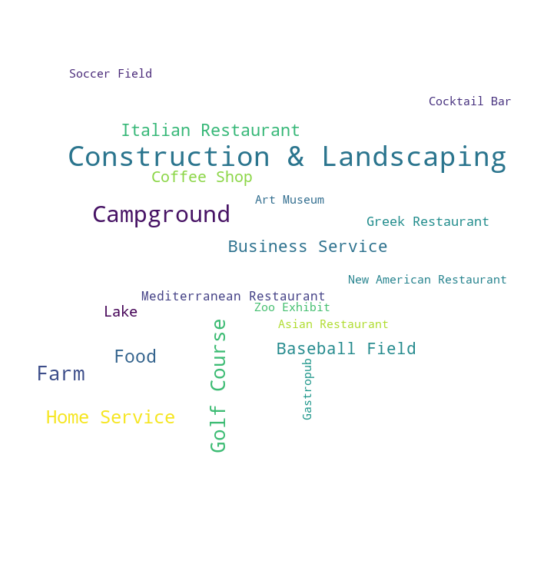

In [365]:
# Libraries
from wordcloud import WordCloud
from PIL import Image   

# Load the image
wave_mask = np.array(Image.open("ohio_border.jpg"))
 
# Make the figure
wordcloud = WordCloud(mask=~wave_mask,background_color="white").generate_from_frequencies(frequencies=d)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [367]:
df_chi2_100 = pd.DataFrame(chi2(X, y)[0][selector100.get_support(indices=True)], columns=['chi2'])

In [369]:
chi2_100venues = df_merged.iloc[:,j_start_class:j_end_class+1].columns[selector100.get_support(indices=True)].tolist()

In [370]:
df_chi2_100.insert(loc=0, column='venue_category', value=chi2_100venues)

In [372]:
d100 = {}
for index, row in df_chi2_100.iterrows():
    #print(row['venue_category'], row['chi2'])
    d100[row['venue_category']] = row['chi2']

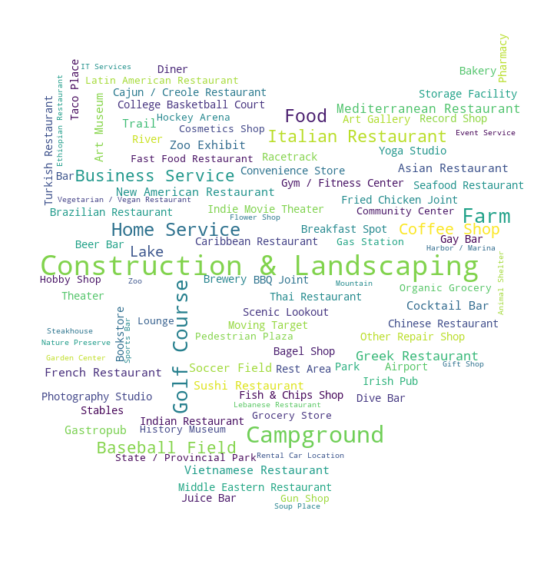

In [374]:
# Libraries
from wordcloud import WordCloud
from PIL import Image   

# Load the image
wave_mask = np.array(Image.open("ohio_border.jpg"))
 
# Make the figure
wordcloud = WordCloud(mask=~wave_mask,background_color="white").generate_from_frequencies(frequencies=d100)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()